In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().DSAMuon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().DSAMuon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Displacement
## dxy, BS, PV related variables

## dxy

4mu dxy structure: [[-1.14, 0.59, -15.9], [84.5, 6.5, -291, ... -345], [-46.8, 4.82, -19.8, -47.5]]
2mu2e dxy structure: [[-2.69, -7.52, 106, -42.8, -3.67], [-0.417, ... 0.343, 7.64], [0.554, -0.229, 20.4]]
4mu dxy structure: [[8.64, -6.34, 0.763, 0.0913, -2.59], [-32.4, ... -28.2, 37.3], [22.6, -223, -5.9]]
2mu2e dxy structure: [[2.39], [-21, -22.9, -26.1, 4.83], ... 5.75, -84.7, 2.12, -157], [-1.06, 1.02]]
4mu dxy structure: [[-0.232, -0.315, 1.19, 329, -11.7, 0.488, ... -0.863, -0.105, 0.418, 4.13, -0.947]]
2mu2e dxy structure: [[16.9, 1.79], [66.3, 1.67], [0.0261, ... 107], [29.7, 8.6, 0.897, -0.0469, 183]]
4mu dxy structure: [[9.15, 3.12, -1.69, -252], [17, -158, ... 24.5, 3.37, -5.09], [-1.58, -4.44, 0.917]]
2mu2e dxy structure: [[-2.82, -1.97, -286, 12.9, 3.16], [1.27, 382, ... [0.334, 0.186], [-1.14, 11]]
4mu dxy structure: [[-7.74, 6.31, 0.465], [-5.88, 14.1, 7.19, ... 2.62], [5.81, 20.4, -39.2, 2.96]]
2mu2e dxy structure: [[-27.8, -0.0184, 1.51, -115, -165], [270, ... -7.17],

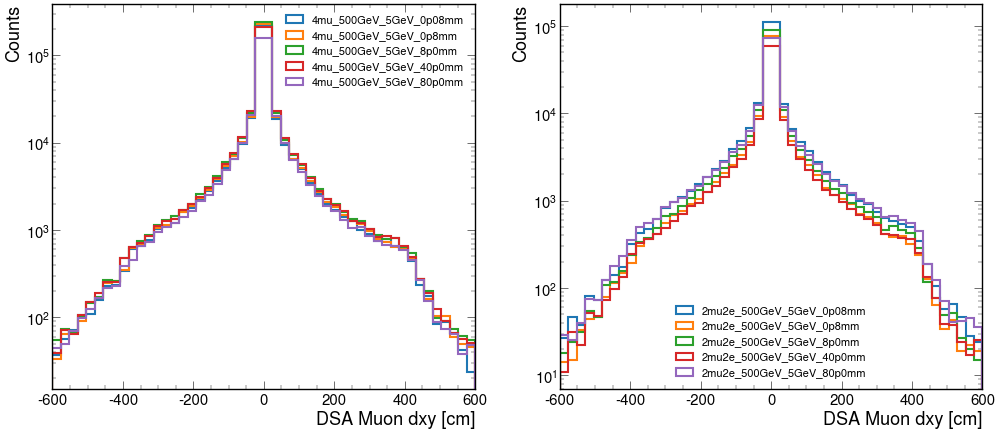

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy", events_4mu[i_4mu].dxy, events_2mu2e[i_2mu].dxy)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy), range=(-600,600), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy), range=(-600,600), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-600,600)
ax[1].set_xlim(-600,600)
ax[0].set_xlabel('DSA Muon dxy [cm]')
ax[1].set_xlabel('DSA Muon dxy [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxy.png", bbox_inches="tight")

4mu dxy structure: [[-1.14, 0.59, -15.9], [84.5, 6.5, -291, ... -345], [-46.8, 4.82, -19.8, -47.5]]
2mu2e dxy structure: [[-2.69, -7.52, 106, -42.8, -3.67], [-0.417, ... 0.343, 7.64], [0.554, -0.229, 20.4]]
4mu dxy structure: [[8.64, -6.34, 0.763, 0.0913, -2.59], [-32.4, ... -28.2, 37.3], [22.6, -223, -5.9]]
2mu2e dxy structure: [[2.39], [-21, -22.9, -26.1, 4.83], ... 5.75, -84.7, 2.12, -157], [-1.06, 1.02]]
4mu dxy structure: [[-0.232, -0.315, 1.19, 329, -11.7, 0.488, ... -0.863, -0.105, 0.418, 4.13, -0.947]]
2mu2e dxy structure: [[16.9, 1.79], [66.3, 1.67], [0.0261, ... 107], [29.7, 8.6, 0.897, -0.0469, 183]]
4mu dxy structure: [[9.15, 3.12, -1.69, -252], [17, -158, ... 24.5, 3.37, -5.09], [-1.58, -4.44, 0.917]]
2mu2e dxy structure: [[-2.82, -1.97, -286, 12.9, 3.16], [1.27, 382, ... [0.334, 0.186], [-1.14, 11]]
4mu dxy structure: [[-7.74, 6.31, 0.465], [-5.88, 14.1, 7.19, ... 2.62], [5.81, 20.4, -39.2, 2.96]]
2mu2e dxy structure: [[-27.8, -0.0184, 1.51, -115, -165], [270, ... -7.17],

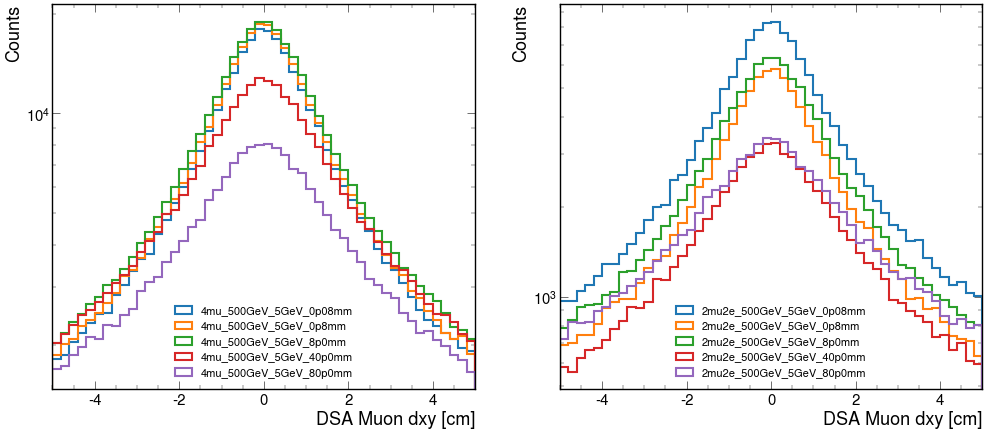

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy", events_4mu[i_4mu].dxy, events_2mu2e[i_2mu].dxy)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-5,5)
ax[1].set_xlim(-5,5)
ax[0].set_xlabel('DSA Muon dxy [cm]')
ax[1].set_xlabel('DSA Muon dxy [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxy_low.png", bbox_inches="tight")

## dxyPVTraj

4mu dxyPVTraj structure: [[1.18, -0.631, 15.9], [-84.5, -6.5, 291, ... 2.46, 345], [46.7, -4.78, 19.8, 47.5]]
2mu2e dxyPVTraj structure: [[2.66, 7.49, -106, 42.8, 3.71], [0.374, ... [-0.35, -7.65], [-0.543, 0.243, -20.4]]
4mu dxyPVTraj structure: [[-8.61, 6.3, -0.799, -0.0563, 2.63], [32.4, ... 28.3, -37.2], [-22.5, 223, 5.86]]
2mu2e dxyPVTraj structure: [[-2.4], [21, 22.9, 26.1, -4.79], ... -5.74, 84.7, -2.08, 157], [1.02, -1.06]]
4mu dxyPVTraj structure: [[0.271, 0.354, -1.15, -328, 11.7, -0.45, ... 0.819, 0.0609, -0.462, -4.1, 0.977]]
2mu2e dxyPVTraj structure: [[-16.9, -1.78], [-66.3, -1.69], ... -107], [-29.7, -8.58, -0.934, 0.0104, -183]]
4mu dxyPVTraj structure: [[-9.18, -3.08, 1.73, 252], [-17, 158, ... -24.5, -3.35, 5.12], [1.6, 4.46, -0.943]]
2mu2e dxyPVTraj structure: [[2.84, 1.99, 286, -12.9, -3.14], [-1.26, -382, ... [-0.375, -0.227], [1.12, -11]]
4mu dxyPVTraj structure: [[7.7, -6.28, -0.502], [5.91, -14.1, -7.21, ... -2.65], [-5.8, -20.4, 39.2, -3]]
2mu2e dxyPVTraj struc

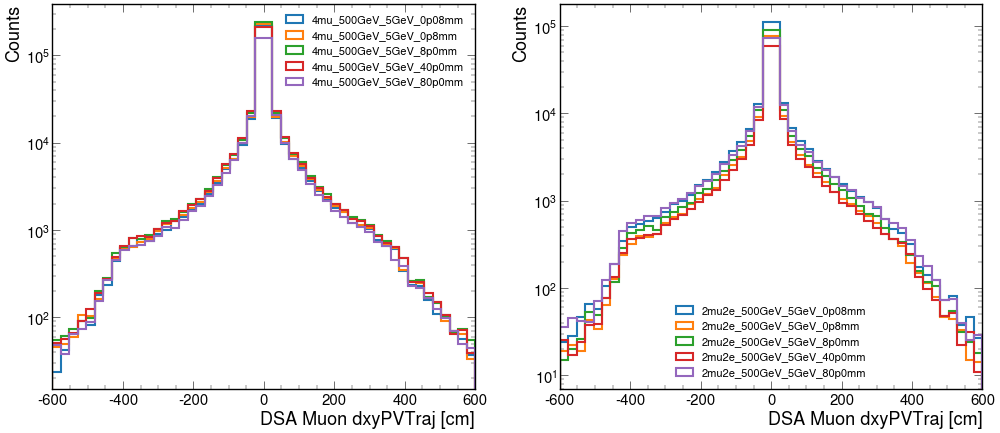

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyPVTraj", events_4mu[i_4mu].dxyPVTraj, events_2mu2e[i_2mu].dxyPVTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyPVTraj), range=(-600,600), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyPVTraj), range=(-600,600), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-600,600)
ax[1].set_xlim(-600,600)
ax[0].set_xlabel('DSA Muon dxyPVTraj [cm]')
ax[1].set_xlabel('DSA Muon dxyPVTraj [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxyPVTraj.png", bbox_inches="tight")

4mu dxyPVTraj structure: [[1.18, -0.631, 15.9], [-84.5, -6.5, 291, ... 2.46, 345], [46.7, -4.78, 19.8, 47.5]]
2mu2e dxyPVTraj structure: [[2.66, 7.49, -106, 42.8, 3.71], [0.374, ... [-0.35, -7.65], [-0.543, 0.243, -20.4]]
4mu dxyPVTraj structure: [[-8.61, 6.3, -0.799, -0.0563, 2.63], [32.4, ... 28.3, -37.2], [-22.5, 223, 5.86]]
2mu2e dxyPVTraj structure: [[-2.4], [21, 22.9, 26.1, -4.79], ... -5.74, 84.7, -2.08, 157], [1.02, -1.06]]
4mu dxyPVTraj structure: [[0.271, 0.354, -1.15, -328, 11.7, -0.45, ... 0.819, 0.0609, -0.462, -4.1, 0.977]]
2mu2e dxyPVTraj structure: [[-16.9, -1.78], [-66.3, -1.69], ... -107], [-29.7, -8.58, -0.934, 0.0104, -183]]
4mu dxyPVTraj structure: [[-9.18, -3.08, 1.73, 252], [-17, 158, ... -24.5, -3.35, 5.12], [1.6, 4.46, -0.943]]
2mu2e dxyPVTraj structure: [[2.84, 1.99, 286, -12.9, -3.14], [-1.26, -382, ... [-0.375, -0.227], [1.12, -11]]
4mu dxyPVTraj structure: [[7.7, -6.28, -0.502], [5.91, -14.1, -7.21, ... -2.65], [-5.8, -20.4, 39.2, -3]]
2mu2e dxyPVTraj struc

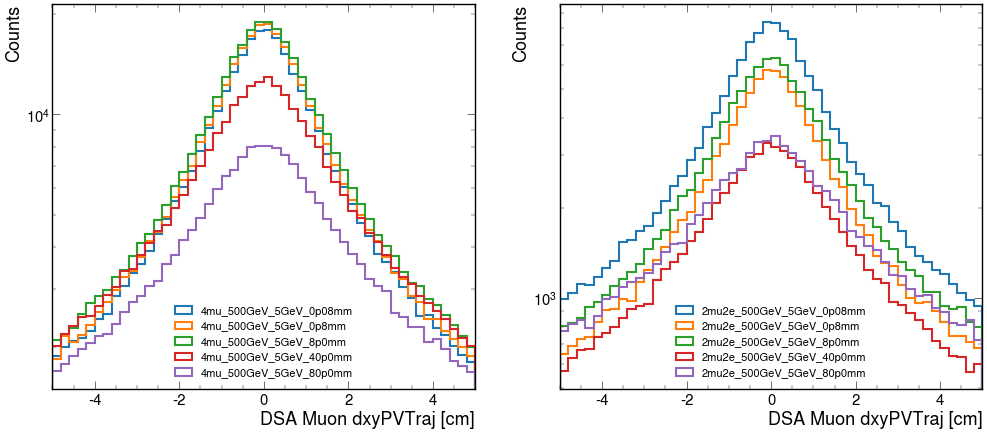

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyPVTraj", events_4mu[i_4mu].dxyPVTraj, events_2mu2e[i_2mu].dxyPVTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyPVTraj), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyPVTraj), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-5,5)
ax[1].set_xlim(-5,5)
ax[0].set_xlabel('DSA Muon dxyPVTraj [cm]')
ax[1].set_xlabel('DSA Muon dxyPVTraj [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxyPVTraj_low.png", bbox_inches="tight")

## dxy - dxyPVTraj

4mu dxy - dxyPVTraj structure: [[-2.31, 1.22, -31.8], [169, 13, -581, ... -4.92, -691], [-93.5, 9.6, -39.6, -95]]
2mu2e dxy - dxyPVTraj structure: [[-5.35, -15, 213, -85.6, -7.38], [-0.791, ... [0.693, 15.3], [1.1, -0.472, 40.7]]
4mu dxy - dxyPVTraj structure: [[17.3, -12.6, 1.56, 0.148, -5.22], [-64.8, ... -56.5, 74.5], [45.1, -445, -11.8]]
2mu2e dxy - dxyPVTraj structure: [[4.79], [-42, -45.8, -52.2, 9.62], ... 11.5, -169, 4.21, -315], [-2.08, 2.08]]
4mu dxy - dxyPVTraj structure: [[-0.503, -0.67, 2.34, 657, -23.4, 0.938, ... -1.68, -0.166, 0.88, 8.24, -1.92]]
2mu2e dxy - dxyPVTraj structure: [[33.8, 3.57], [133, 3.36], [0.088, ... 214], [59.4, 17.2, 1.83, -0.0573, 366]]
4mu dxy - dxyPVTraj structure: [[18.3, 6.19, -3.42, -504], [34.1, -317, ... 49, 6.72, -10.2], [-3.18, -8.89, 1.86]]
2mu2e dxy - dxyPVTraj structure: [[-5.66, -3.96, -571, 25.9, 6.3], [2.53, 764, ... -329], [0.709, 0.413], [-2.26, 22]]
4mu dxy - dxyPVTraj structure: [[-15.4, 12.6, 0.967], [-11.8, 28.3, 14.4, ... 5.27]

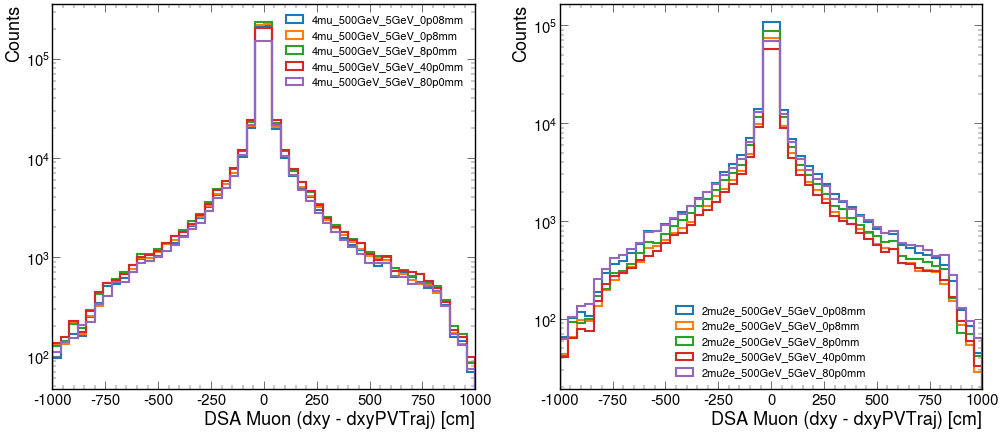

In [22]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyPVTraj", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVTraj, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVTraj), range=(-1000,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVTraj), range=(-1000,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1000,1000)
ax[1].set_xlim(-1000,1000)
ax[0].set_xlabel('DSA Muon (dxy - dxyPVTraj) [cm]')
ax[1].set_xlabel('DSA Muon (dxy - dxyPVTraj) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxy-dxyPVTraj.png", bbox_inches="tight")

4mu dxy - dxyPVTraj structure: [[-2.31, 1.22, -31.8], [169, 13, -581, ... -4.92, -691], [-93.5, 9.6, -39.6, -95]]
2mu2e dxy - dxyPVTraj structure: [[-5.35, -15, 213, -85.6, -7.38], [-0.791, ... [0.693, 15.3], [1.1, -0.472, 40.7]]
4mu dxy - dxyPVTraj structure: [[17.3, -12.6, 1.56, 0.148, -5.22], [-64.8, ... -56.5, 74.5], [45.1, -445, -11.8]]
2mu2e dxy - dxyPVTraj structure: [[4.79], [-42, -45.8, -52.2, 9.62], ... 11.5, -169, 4.21, -315], [-2.08, 2.08]]
4mu dxy - dxyPVTraj structure: [[-0.503, -0.67, 2.34, 657, -23.4, 0.938, ... -1.68, -0.166, 0.88, 8.24, -1.92]]
2mu2e dxy - dxyPVTraj structure: [[33.8, 3.57], [133, 3.36], [0.088, ... 214], [59.4, 17.2, 1.83, -0.0573, 366]]
4mu dxy - dxyPVTraj structure: [[18.3, 6.19, -3.42, -504], [34.1, -317, ... 49, 6.72, -10.2], [-3.18, -8.89, 1.86]]
2mu2e dxy - dxyPVTraj structure: [[-5.66, -3.96, -571, 25.9, 6.3], [2.53, 764, ... -329], [0.709, 0.413], [-2.26, 22]]
4mu dxy - dxyPVTraj structure: [[-15.4, 12.6, 0.967], [-11.8, 28.3, 14.4, ... 5.27]

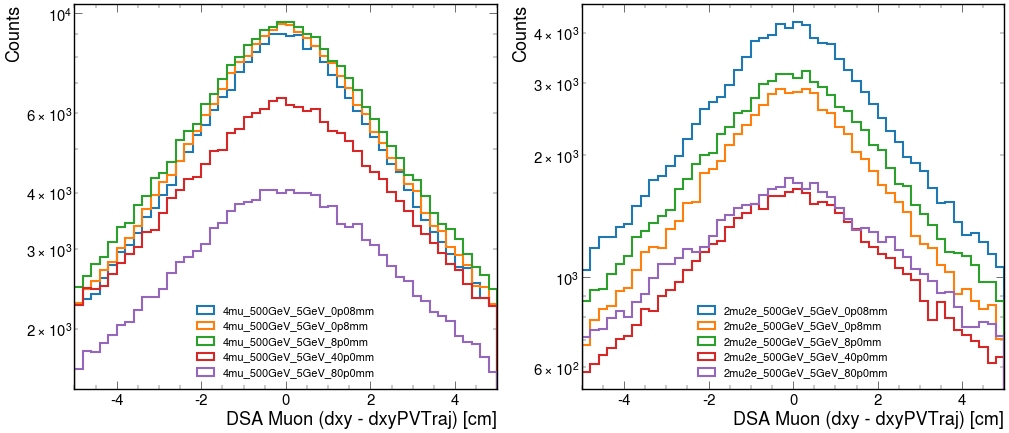

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyPVTraj", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVTraj, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVTraj), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVTraj), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-5,5)
ax[1].set_xlim(-5,5)
ax[0].set_xlabel('DSA Muon (dxy - dxyPVTraj) [cm]')
ax[1].set_xlabel('DSA Muon (dxy - dxyPVTraj) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxy-dxyPVTraj_low.png", bbox_inches="tight")

## dxyPVSigned

4mu dxyPVSigned structure: [[1.18, -0.631, 15.9], [84.5, 6.5, -291, ... -2.46, 345], [46.7, 4.78, 19.8, 47.5]]
2mu2e dxyPVSigned structure: [[2.66, 7.49, -106, 42.8, 3.71], [0.374, ... [0.35, -7.65], [0.543, 0.243, -20.4]]
4mu dxyPVSigned structure: [[8.61, 6.3, 0.799, -0.0563, -2.63], [-32.4, ... -28.3, -37.2], [22.5, 223, -5.86]]
2mu2e dxyPVSigned structure: [[2.4], [21, -22.9, 26.1, -4.79], ... 5.74, 84.7, -2.08, 157], [-1.02, -1.06]]
4mu dxyPVSigned structure: [[0.271, 0.354, 1.15, -328, 11.7, 0.45, ... 0.819, -0.0609, -0.462, 4.1, 0.977]]
2mu2e dxyPVSigned structure: [[-16.9, -1.78], [66.3, 1.69], ... 107], [29.7, -8.58, 0.934, -0.0104, -183]]
4mu dxyPVSigned structure: [[9.18, 3.08, 1.73, 252], [-17, 158, ... -24.5, 3.35, 5.12], [1.6, 4.46, 0.943]]
2mu2e dxyPVSigned structure: [[2.84, 1.99, 286, 12.9, 3.14], [-1.26, 382, ... [0.375, -0.227], [-1.12, -11]]
4mu dxyPVSigned structure: [[7.7, 6.28, 0.502], [5.91, 14.1, -7.21, ... 36.8, -2.65], [-5.8, -20.4, -39.2, 3]]
2mu2e dxyPVSign

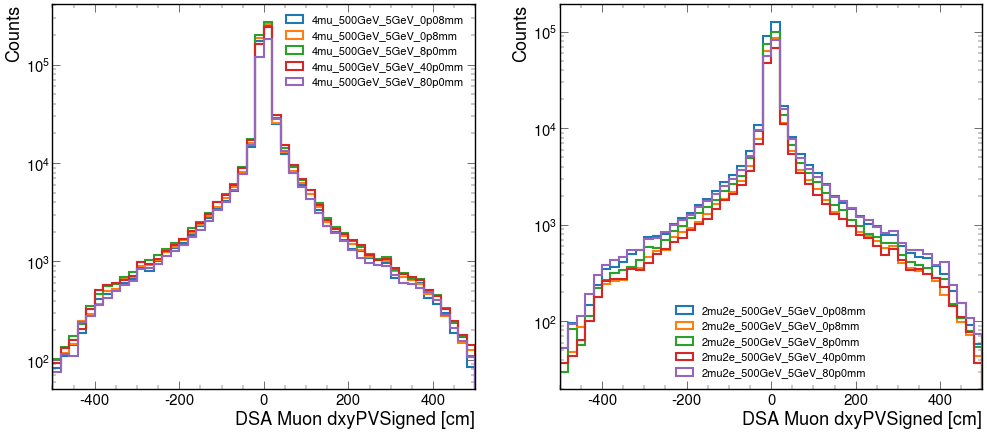

In [23]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyPVSigned", events_4mu[i_4mu].dxyPVSigned, events_2mu2e[i_2mu].dxyPVSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyPVSigned), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyPVSigned), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-500,500)
ax[1].set_xlim(-500,500)
ax[0].set_xlabel('DSA Muon dxyPVSigned [cm]')
ax[1].set_xlabel('DSA Muon dxyPVSigned [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxyPVSigned.png", bbox_inches="tight")

4mu dxyPVSigned structure: [[1.18, -0.631, 15.9], [84.5, 6.5, -291, ... -2.46, 345], [46.7, 4.78, 19.8, 47.5]]
2mu2e dxyPVSigned structure: [[2.66, 7.49, -106, 42.8, 3.71], [0.374, ... [0.35, -7.65], [0.543, 0.243, -20.4]]
4mu dxyPVSigned structure: [[8.61, 6.3, 0.799, -0.0563, -2.63], [-32.4, ... -28.3, -37.2], [22.5, 223, -5.86]]
2mu2e dxyPVSigned structure: [[2.4], [21, -22.9, 26.1, -4.79], ... 5.74, 84.7, -2.08, 157], [-1.02, -1.06]]
4mu dxyPVSigned structure: [[0.271, 0.354, 1.15, -328, 11.7, 0.45, ... 0.819, -0.0609, -0.462, 4.1, 0.977]]
2mu2e dxyPVSigned structure: [[-16.9, -1.78], [66.3, 1.69], ... 107], [29.7, -8.58, 0.934, -0.0104, -183]]
4mu dxyPVSigned structure: [[9.18, 3.08, 1.73, 252], [-17, 158, ... -24.5, 3.35, 5.12], [1.6, 4.46, 0.943]]
2mu2e dxyPVSigned structure: [[2.84, 1.99, 286, 12.9, 3.14], [-1.26, 382, ... [0.375, -0.227], [-1.12, -11]]
4mu dxyPVSigned structure: [[7.7, 6.28, 0.502], [5.91, 14.1, -7.21, ... 36.8, -2.65], [-5.8, -20.4, -39.2, 3]]
2mu2e dxyPVSign

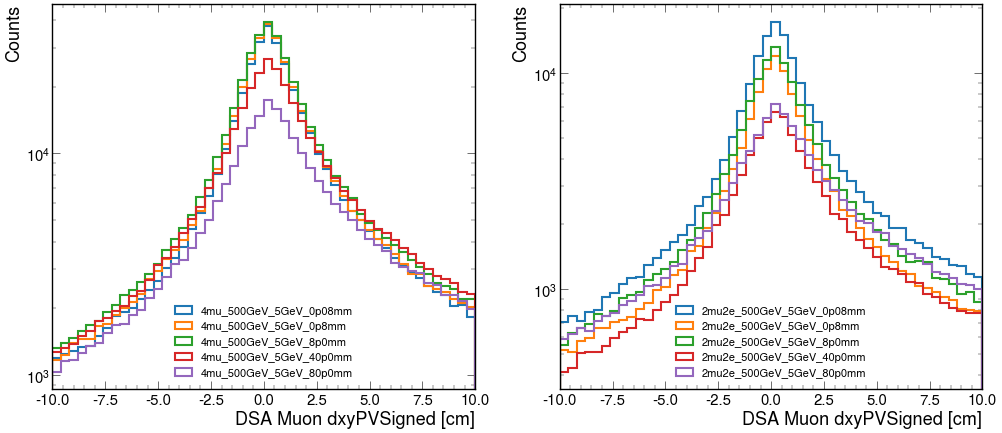

In [32]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyPVSigned", events_4mu[i_4mu].dxyPVSigned, events_2mu2e[i_2mu].dxyPVSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyPVSigned), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyPVSigned), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-10,10)
ax[1].set_xlim(-10,10)
ax[0].set_xlabel('DSA Muon dxyPVSigned [cm]')
ax[1].set_xlabel('DSA Muon dxyPVSigned [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxyPVSigned_low.png", bbox_inches="tight")

## dxy - dxyPVSigned

4mu dxy - dxyPVSigned structure: [[-2.31, 1.22, -31.8], [-0.0316, 0.00503, ... -691], [-93.5, 0.0319, -39.6, -95]]
2mu2e dxy - dxyPVSigned structure: [[-5.35, -15, 213, -85.6, -7.38], ... -0.00716, 15.3], [0.0105, -0.472, 40.7]]
4mu dxy - dxyPVSigned structure: [[0.0294, -12.6, -0.0355, 0.148, 0.0348], ... 74.5], [0.0395, -445, -0.0425]]
2mu2e dxy - dxyPVSigned structure: [[-0.000766], [-42, 0.00746, -52.2, 9.62], ... -169, 4.21, -315], [-0.0459, 2.08]]
4mu dxy - dxyPVSigned structure: [[-0.503, -0.67, 0.0372, 657, -23.4, ... -1.68, -0.0441, 0.88, 0.0311, -1.92]]
2mu2e dxy - dxyPVSigned structure: [[33.8, 3.57], [0.00463, -0.0123], ... [-0.0393, 17.2, -0.0369, -0.0366, 366]]
4mu dxy - dxyPVSigned structure: [[-0.036, 0.0408, -3.42, -504], [34.1, ... 0.0197, -10.2], [-3.18, -8.89, -0.0253]]
2mu2e dxy - dxyPVSigned structure: [[-5.66, -3.96, -571, -0.0093, 0.0246], [2.53, ... [-0.0415, 0.413], [-0.022, 22]]
4mu dxy - dxyPVSigned structure: [[-15.4, 0.0348, -0.0369], [-11.8, -0.042, ... 5

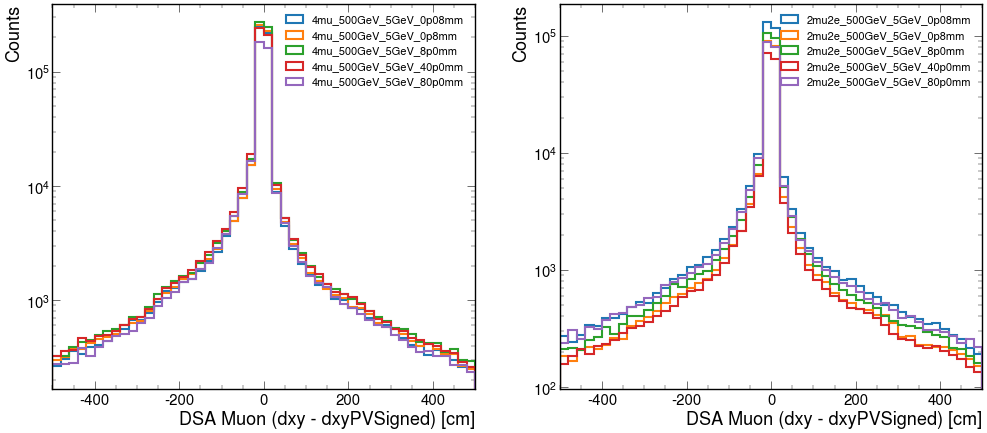

In [33]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyPVSigned", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVSigned, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVSigned), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVSigned), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-500,500)
ax[1].set_xlim(-500,500)
ax[0].set_xlabel('DSA Muon (dxy - dxyPVSigned) [cm]')
ax[1].set_xlabel('DSA Muon (dxy - dxyPVSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxy-dxyPVSigned.png", bbox_inches="tight")

4mu dxy - dxyPVSigned structure: [[-2.31, 1.22, -31.8], [-0.0316, 0.00503, ... -691], [-93.5, 0.0319, -39.6, -95]]
2mu2e dxy - dxyPVSigned structure: [[-5.35, -15, 213, -85.6, -7.38], ... -0.00716, 15.3], [0.0105, -0.472, 40.7]]
4mu dxy - dxyPVSigned structure: [[0.0294, -12.6, -0.0355, 0.148, 0.0348], ... 74.5], [0.0395, -445, -0.0425]]
2mu2e dxy - dxyPVSigned structure: [[-0.000766], [-42, 0.00746, -52.2, 9.62], ... -169, 4.21, -315], [-0.0459, 2.08]]
4mu dxy - dxyPVSigned structure: [[-0.503, -0.67, 0.0372, 657, -23.4, ... -1.68, -0.0441, 0.88, 0.0311, -1.92]]
2mu2e dxy - dxyPVSigned structure: [[33.8, 3.57], [0.00463, -0.0123], ... [-0.0393, 17.2, -0.0369, -0.0366, 366]]
4mu dxy - dxyPVSigned structure: [[-0.036, 0.0408, -3.42, -504], [34.1, ... 0.0197, -10.2], [-3.18, -8.89, -0.0253]]
2mu2e dxy - dxyPVSigned structure: [[-5.66, -3.96, -571, -0.0093, 0.0246], [2.53, ... [-0.0415, 0.413], [-0.022, 22]]
4mu dxy - dxyPVSigned structure: [[-15.4, 0.0348, -0.0369], [-11.8, -0.042, ... 5

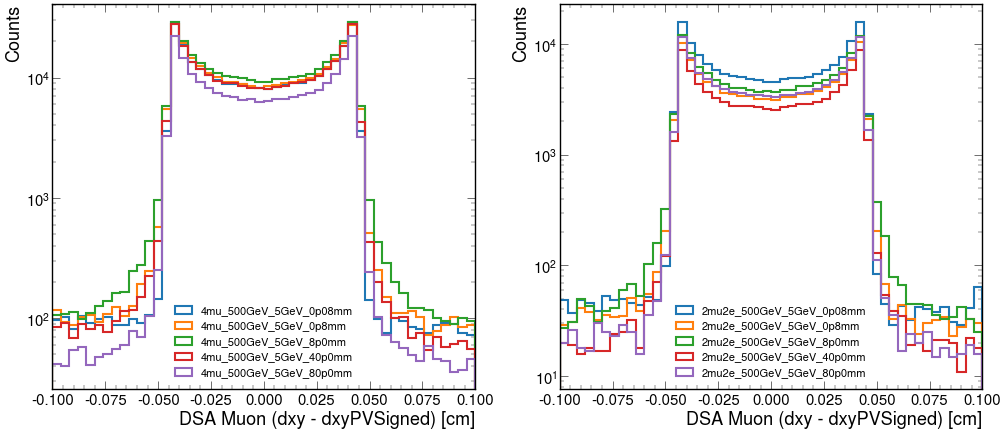

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyPVSigned", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVSigned, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVSigned), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVSigned), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('DSA Muon (dxy - dxyPVSigned) [cm]')
ax[1].set_xlabel('DSA Muon (dxy - dxyPVSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxy-dxyPVSigned_low.png", bbox_inches="tight")

4mu dxy - dxyPVSigned structure: [[-2.31, 1.22, -31.8], [-0.0316, 0.00503, ... -691], [-93.5, 0.0319, -39.6, -95]]
2mu2e dxy - dxyPVSigned structure: [[-5.35, -15, 213, -85.6, -7.38], ... -0.00716, 15.3], [0.0105, -0.472, 40.7]]
4mu dxy - dxyPVSigned structure: [[0.0294, -12.6, -0.0355, 0.148, 0.0348], ... 74.5], [0.0395, -445, -0.0425]]
2mu2e dxy - dxyPVSigned structure: [[-0.000766], [-42, 0.00746, -52.2, 9.62], ... -169, 4.21, -315], [-0.0459, 2.08]]
4mu dxy - dxyPVSigned structure: [[-0.503, -0.67, 0.0372, 657, -23.4, ... -1.68, -0.0441, 0.88, 0.0311, -1.92]]
2mu2e dxy - dxyPVSigned structure: [[33.8, 3.57], [0.00463, -0.0123], ... [-0.0393, 17.2, -0.0369, -0.0366, 366]]
4mu dxy - dxyPVSigned structure: [[-0.036, 0.0408, -3.42, -504], [34.1, ... 0.0197, -10.2], [-3.18, -8.89, -0.0253]]
2mu2e dxy - dxyPVSigned structure: [[-5.66, -3.96, -571, -0.0093, 0.0246], [2.53, ... [-0.0415, 0.413], [-0.022, 22]]
4mu dxy - dxyPVSigned structure: [[-15.4, 0.0348, -0.0369], [-11.8, -0.042, ... 5

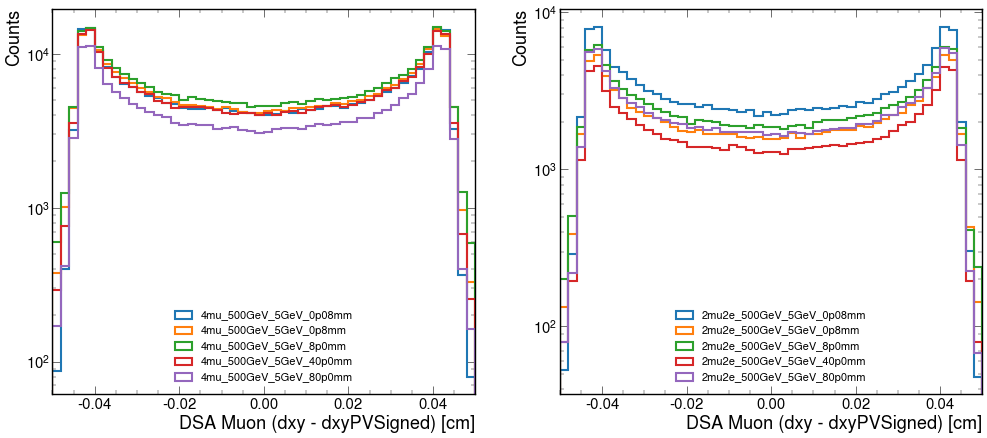

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyPVSigned", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVSigned, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVSigned), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVSigned), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.05,0.05)
ax[1].set_xlim(-0.05,0.05)
ax[0].set_xlabel('DSA Muon (dxy - dxyPVSigned) [cm]')
ax[1].set_xlabel('DSA Muon (dxy - dxyPVSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxy-dxyPVSigned_superlow.png", bbox_inches="tight")

## dxyBS

4mu dxyBS structure: [[-1.17, 0.63, -15.9], [84.5, 6.5, -291, ... -345], [-46.7, 4.78, -19.8, -47.5]]
2mu2e dxyBS structure: [[-2.66, -7.48, 106, -42.8, -3.71], [-0.375, ... [0.35, 7.65], [0.544, -0.242, 20.4]]
4mu dxyBS structure: [[8.61, -6.31, 0.796, 0.0592, -2.62], [-32.4, ... -28.3, 37.2], [22.5, -223, -5.86]]
2mu2e dxyBS structure: [[2.39], [-21, -22.9, -26.1, 4.79], ... 5.74, -84.7, 2.08, -157], [-1.02, 1.05]]
4mu dxyBS structure: [[-0.271, -0.354, 1.15, 328, -11.7, 0.45, ... -0.82, -0.0619, 0.461, 4.1, -0.976]]
2mu2e dxyBS structure: [[16.9, 1.78], [66.3, 1.69], [0.0634, ... 107], [29.7, 8.58, 0.934, -0.0108, 183]]
4mu dxyBS structure: [[9.18, 3.08, -1.73, -252], [17, -158, ... 24.5, 3.35, -5.12], [-1.6, -4.46, 0.942]]
2mu2e dxyBS structure: [[-2.85, -1.99, -286, 12.9, 3.14], [1.26, 382, ... [0.377, 0.229], [-1.12, 11]]
4mu dxyBS structure: [[-7.7, 6.28, 0.502], [-5.92, 14.1, 7.22, ... 36.8, 2.65], [5.8, 20.4, -39.2, 3]]
2mu2e dxyBS structure: [[-27.8, -0.00549, 1.52, -115, -16

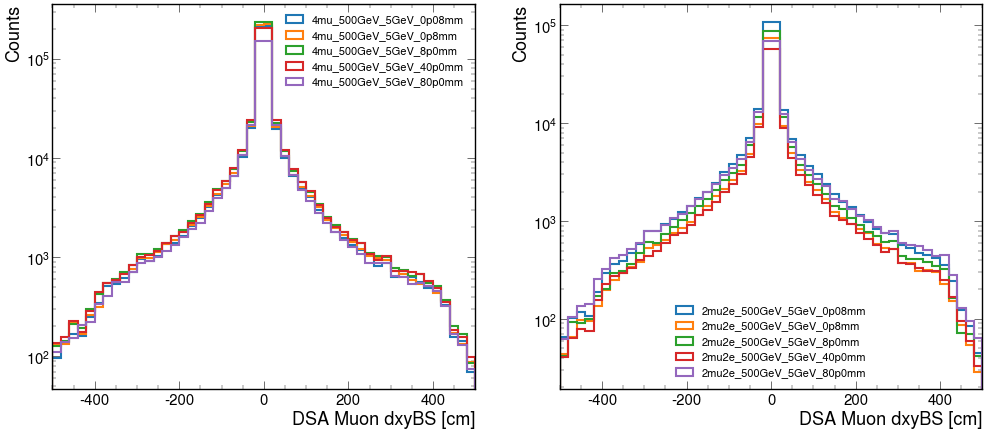

In [36]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBS", events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBS), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBS), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-500,500)
ax[1].set_xlim(-500,500)
ax[0].set_xlabel('DSA Muon dxyBS [cm]')
ax[1].set_xlabel('DSA Muon dxyBS [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxyBS.png", bbox_inches="tight")

4mu dxyBS structure: [[-1.17, 0.63, -15.9], [84.5, 6.5, -291, ... -345], [-46.7, 4.78, -19.8, -47.5]]
2mu2e dxyBS structure: [[-2.66, -7.48, 106, -42.8, -3.71], [-0.375, ... [0.35, 7.65], [0.544, -0.242, 20.4]]
4mu dxyBS structure: [[8.61, -6.31, 0.796, 0.0592, -2.62], [-32.4, ... -28.3, 37.2], [22.5, -223, -5.86]]
2mu2e dxyBS structure: [[2.39], [-21, -22.9, -26.1, 4.79], ... 5.74, -84.7, 2.08, -157], [-1.02, 1.05]]
4mu dxyBS structure: [[-0.271, -0.354, 1.15, 328, -11.7, 0.45, ... -0.82, -0.0619, 0.461, 4.1, -0.976]]
2mu2e dxyBS structure: [[16.9, 1.78], [66.3, 1.69], [0.0634, ... 107], [29.7, 8.58, 0.934, -0.0108, 183]]
4mu dxyBS structure: [[9.18, 3.08, -1.73, -252], [17, -158, ... 24.5, 3.35, -5.12], [-1.6, -4.46, 0.942]]
2mu2e dxyBS structure: [[-2.85, -1.99, -286, 12.9, 3.14], [1.26, 382, ... [0.377, 0.229], [-1.12, 11]]
4mu dxyBS structure: [[-7.7, 6.28, 0.502], [-5.92, 14.1, 7.22, ... 36.8, 2.65], [5.8, 20.4, -39.2, 3]]
2mu2e dxyBS structure: [[-27.8, -0.00549, 1.52, -115, -16

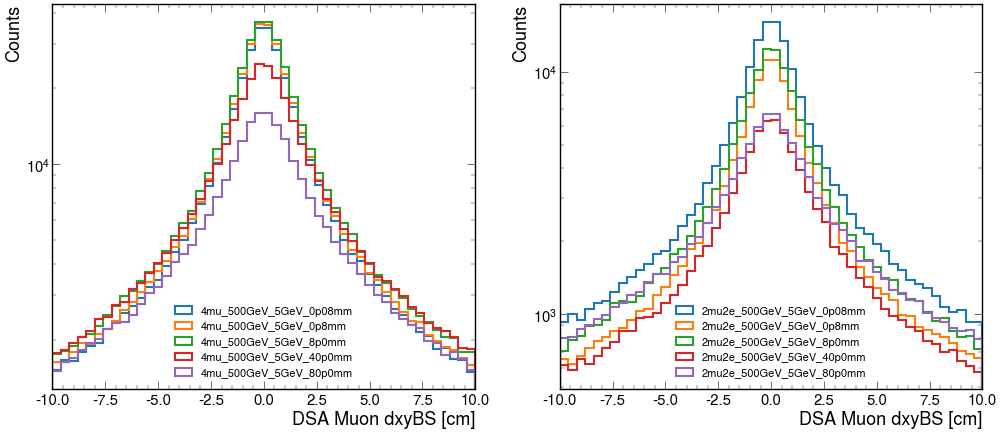

In [37]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBS", events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBS), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBS), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-10,10)
ax[1].set_xlim(-10,10)
ax[0].set_xlabel('DSA Muon dxyBS [cm]')
ax[1].set_xlabel('DSA Muon dxyBS [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxyBS_low.png", bbox_inches="tight")

## dxy - dxyBS

4mu dxy - dxyBS structure: [[0.0387, -0.0394, -0.0379], [-0.0336, ... [-0.0378, 0.0311, 0.0346, -0.0354]]
2mu2e dxy - dxyBS structure: [[-0.0354, -0.035, -0.00698, -0.0296, 0.0391], ... -0.00261], [0.01, 0.013, 0.00033]]
4mu dxy - dxyBS structure: [[0.0277, -0.0313, -0.0325, 0.0321, 0.0318], ... 0.0341], [0.0411, 0.0133, -0.0431]]
2mu2e dxy - dxyBS structure: [[0.000853], [0.033, 0.00527, 0.0226, ... 0.0431, -0.0352], [-0.0398, -0.0388]]
4mu dxy - dxyBS structure: [[0.0386, 0.0387, 0.0372, 0.0402, -0.0157, ... -0.0432, -0.0432, 0.03, 0.0286]]
2mu2e dxy - dxyBS structure: [[0.0104, 0.0078], [0.00568, ... -0.0388, 0.0266, -0.0364, -0.0361, -0.0338]]
4mu dxy - dxyBS structure: [[-0.037, 0.0417, 0.0422, -0.015], [-0.00791, ... 0.0301], [0.0221, 0.0204, -0.0248]]
2mu2e dxy - dxyBS structure: [[0.0292, 0.0246, -0.00369, -0.0113, 0.0267], ... -0.043], [-0.0255, -0.0271]]
4mu dxy - dxyBS structure: [[-0.0375, 0.0352, -0.0372], [0.035, ... [0.00411, -0.0242, 0.0192, -0.0382]]
2mu2e dxy - dxyBS 

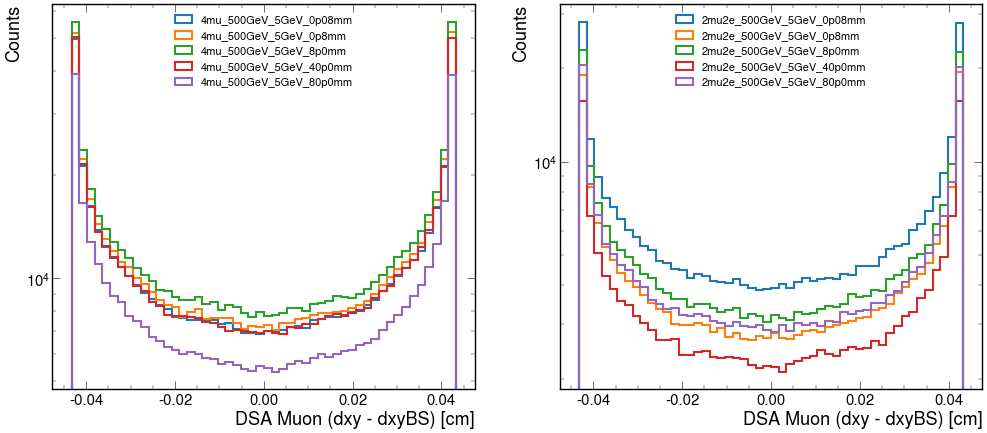

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyBS", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBS), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBS),alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
#ax[0].set_xlim(-0.05,0.05)
#ax[1].set_xlim(-0.05,0.05)
ax[0].set_xlabel('DSA Muon (dxy - dxyBS) [cm]')
ax[1].set_xlabel('DSA Muon (dxy - dxyBS) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
#plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxy-dxyBS.png", bbox_inches="tight")

## dxyBSTraj

4mu dxyBSTraj structure: [[1.14, 0.59, 15.9], [84.5, 6.5, 291, ... 2.47, 345], [46.8, 4.82, 19.8, 47.5]]
2mu2e dxyBSTraj structure: [[2.69, 7.52, 106, 42.8, 3.67], [0.417, ... [0.343, 7.64], [0.554, 0.229, 20.4]]
4mu dxyBSTraj structure: [[8.64, 6.34, 0.763, 0.0913, 2.59], [32.4, ... 105, 28.2, 37.3], [22.6, 223, 5.9]]
2mu2e dxyBSTraj structure: [[2.39], [21, 22.9, 26.1, 4.83], ... 8.22, 5.75, 84.7, 2.12, 157], [1.06, 1.02]]
4mu dxyBSTraj structure: [[0.232, 0.315, 1.19, 329, 11.7, 0.488, ... 3.3, 0.863, 0.105, 0.418, 4.13, 0.947]]
2mu2e dxyBSTraj structure: [[16.9, 1.79], [66.3, 1.67], [0.0261, ... 107], [29.7, 8.6, 0.897, 0.0469, 183]]
4mu dxyBSTraj structure: [[9.15, 3.12, 1.69, 252], [17, 158, ... 24.5, 3.37, 5.09], [1.58, 4.44, 0.917]]
2mu2e dxyBSTraj structure: [[2.82, 1.97, 286, 12.9, 3.16], [1.27, 382, ... 165], [0.334, 0.186], [1.14, 11]]
4mu dxyBSTraj structure: [[7.74, 6.31, 0.465], [5.88, 14.1, 7.19, ... 36.8, 2.62], [5.81, 20.4, 39.2, 2.96]]
2mu2e dxyBSTraj structure: [[27

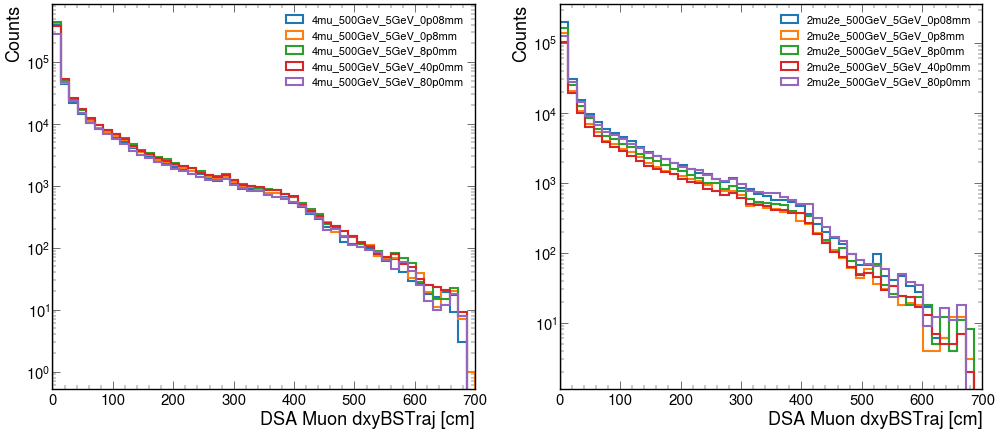

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBSTraj", events_4mu[i_4mu].dxyBSTraj, events_2mu2e[i_2mu].dxyBSTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBSTraj), range=(0,700), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBSTraj), range=(0,700), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,700)
ax[1].set_xlim(0,700)
ax[0].set_xlabel('DSA Muon dxyBSTraj [cm]')
ax[1].set_xlabel('DSA Muon dxyBSTraj [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxyBSTraj.png", bbox_inches="tight")

4mu dxyBSTraj structure: [[1.14, 0.59, 15.9], [84.5, 6.5, 291, ... 2.47, 345], [46.8, 4.82, 19.8, 47.5]]
2mu2e dxyBSTraj structure: [[2.69, 7.52, 106, 42.8, 3.67], [0.417, ... [0.343, 7.64], [0.554, 0.229, 20.4]]
4mu dxyBSTraj structure: [[8.64, 6.34, 0.763, 0.0913, 2.59], [32.4, ... 105, 28.2, 37.3], [22.6, 223, 5.9]]
2mu2e dxyBSTraj structure: [[2.39], [21, 22.9, 26.1, 4.83], ... 8.22, 5.75, 84.7, 2.12, 157], [1.06, 1.02]]
4mu dxyBSTraj structure: [[0.232, 0.315, 1.19, 329, 11.7, 0.488, ... 3.3, 0.863, 0.105, 0.418, 4.13, 0.947]]
2mu2e dxyBSTraj structure: [[16.9, 1.79], [66.3, 1.67], [0.0261, ... 107], [29.7, 8.6, 0.897, 0.0469, 183]]
4mu dxyBSTraj structure: [[9.15, 3.12, 1.69, 252], [17, 158, ... 24.5, 3.37, 5.09], [1.58, 4.44, 0.917]]
2mu2e dxyBSTraj structure: [[2.82, 1.97, 286, 12.9, 3.16], [1.27, 382, ... 165], [0.334, 0.186], [1.14, 11]]
4mu dxyBSTraj structure: [[7.74, 6.31, 0.465], [5.88, 14.1, 7.19, ... 36.8, 2.62], [5.81, 20.4, 39.2, 2.96]]
2mu2e dxyBSTraj structure: [[27

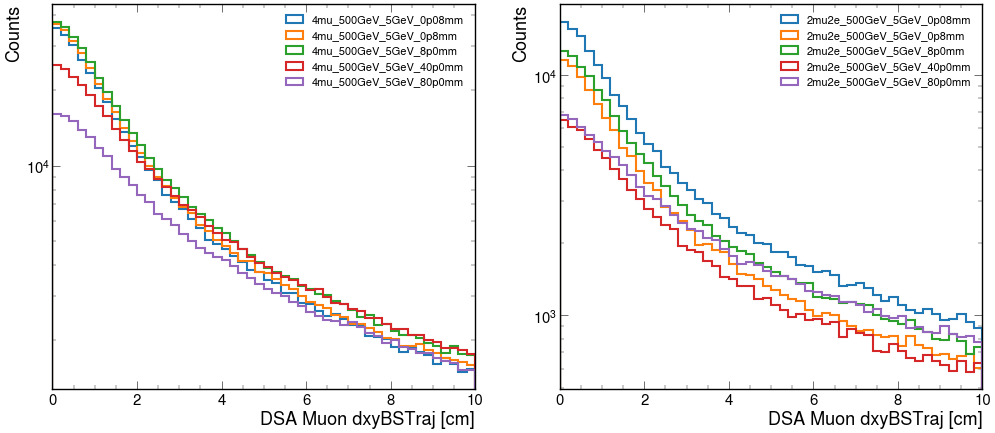

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBSTraj", events_4mu[i_4mu].dxyBSTraj, events_2mu2e[i_2mu].dxyBSTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBSTraj), range=(0,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBSTraj), range=(0,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,10)
ax[1].set_xlim(0,10)
ax[0].set_xlabel('DSA Muon dxyBSTraj [cm]')
ax[1].set_xlabel('DSA Muon dxyBSTraj [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxyBSTraj_low.png", bbox_inches="tight")

## dxyBSSigned

4mu dxyBSSigned structure: [[1.17, -0.63, 15.9], [84.5, 6.5, -291, ... 2.45, 345], [46.7, 4.78, 19.8, 47.5]]
2mu2e dxyBSSigned structure: [[2.66, 7.48, -106, 42.8, 3.71], [0.375, ... [0.35, -7.65], [-0.544, -0.242, -20.4]]
4mu dxyBSSigned structure: [[8.61, 6.31, 0.796, 0.0592, 2.62], [-32.4, ... 105, 28.3, -37.2], [22.5, 223, 5.86]]
2mu2e dxyBSSigned structure: [[-2.39], [21, -22.9, 26.1, -4.79], ... 5.74, 84.7, -2.08, 157], [-1.02, -1.05]]
4mu dxyBSSigned structure: [[0.271, 0.354, 1.15, -328, 11.7, 0.45, ... 3.33, 0.82, -0.0619, -0.461, 4.1, 0.976]]
2mu2e dxyBSSigned structure: [[-16.9, -1.78], [66.3, 1.69], ... 107], [29.7, -8.58, -0.934, 0.0108, -183]]
4mu dxyBSSigned structure: [[9.18, 3.08, 1.73, 252], [-17, 158, ... -24.5, 3.35, 5.12], [1.6, 4.46, 0.942]]
2mu2e dxyBSSigned structure: [[2.85, 1.99, 286, 12.9, -3.14], [1.26, 382, ... -165], [0.377, -0.229], [-1.12, 11]]
4mu dxyBSSigned structure: [[-7.7, 6.28, 0.502], [5.92, 14.1, -7.22, ... 36.8, -2.65], [-5.8, -20.4, 39.2, 3]]


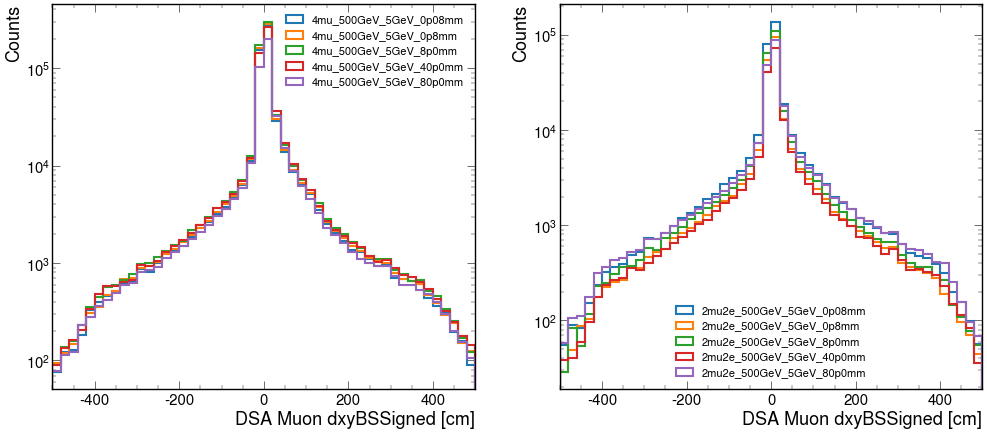

In [46]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBSSigned", events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBSSigned), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBSSigned), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-500,500)
ax[1].set_xlim(-500,500)
ax[0].set_xlabel('DSA Muon dxyBSSigned [cm]')
ax[1].set_xlabel('DSA Muon dxyBSSigned [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxyBSSigned.png", bbox_inches="tight")

4mu dxyBSSigned structure: [[1.17, -0.63, 15.9], [84.5, 6.5, -291, ... 2.45, 345], [46.7, 4.78, 19.8, 47.5]]
2mu2e dxyBSSigned structure: [[2.66, 7.48, -106, 42.8, 3.71], [0.375, ... [0.35, -7.65], [-0.544, -0.242, -20.4]]
4mu dxyBSSigned structure: [[8.61, 6.31, 0.796, 0.0592, 2.62], [-32.4, ... 105, 28.3, -37.2], [22.5, 223, 5.86]]
2mu2e dxyBSSigned structure: [[-2.39], [21, -22.9, 26.1, -4.79], ... 5.74, 84.7, -2.08, 157], [-1.02, -1.05]]
4mu dxyBSSigned structure: [[0.271, 0.354, 1.15, -328, 11.7, 0.45, ... 3.33, 0.82, -0.0619, -0.461, 4.1, 0.976]]
2mu2e dxyBSSigned structure: [[-16.9, -1.78], [66.3, 1.69], ... 107], [29.7, -8.58, -0.934, 0.0108, -183]]
4mu dxyBSSigned structure: [[9.18, 3.08, 1.73, 252], [-17, 158, ... -24.5, 3.35, 5.12], [1.6, 4.46, 0.942]]
2mu2e dxyBSSigned structure: [[2.85, 1.99, 286, 12.9, -3.14], [1.26, 382, ... -165], [0.377, -0.229], [-1.12, 11]]
4mu dxyBSSigned structure: [[-7.7, 6.28, 0.502], [5.92, 14.1, -7.22, ... 36.8, -2.65], [-5.8, -20.4, 39.2, 3]]


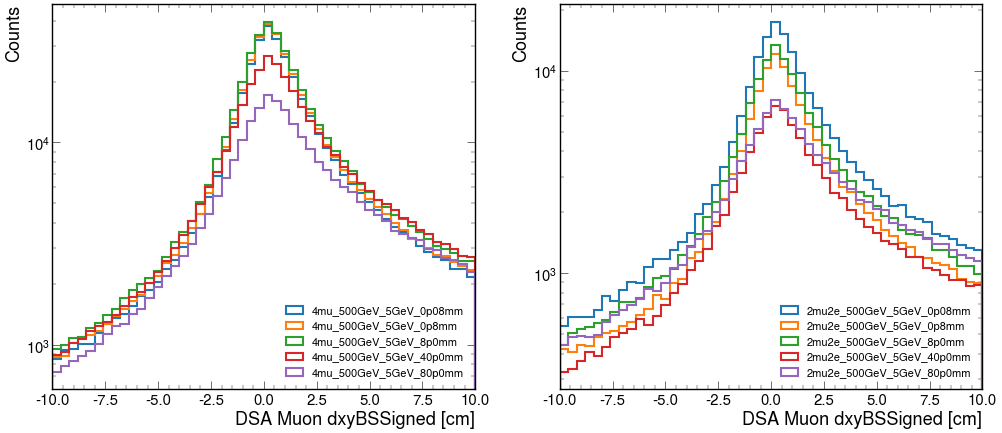

In [49]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBSSigned", events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBSSigned), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBSSigned), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-10,10)
ax[1].set_xlim(-10,10)
ax[0].set_xlabel('DSA Muon dxyBSSigned [cm]')
ax[1].set_xlabel('DSA Muon dxyBSSigned [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxyBSSigned_low.png", bbox_inches="tight")

## dxy - dxyBSSigned

4mu dxy - dxyBSSigned structure: [[-2.31, 1.22, -31.8], [-0.0336, 0.00507, ... -691], [-93.5, 0.0311, -39.6, -95]]
2mu2e dxy - dxyBSSigned structure: [[-5.35, -15, 213, -85.6, -7.37], [-0.791, ... [-0.00744, 15.3], [1.1, 0.013, 40.7]]
4mu dxy - dxyBSSigned structure: [[0.0277, -12.6, -0.0325, 0.0321, -5.22], ... -56.5, 74.5], [0.0411, -445, -11.8]]
2mu2e dxy - dxyBSSigned structure: [[4.79], [-42, 0.00526, -52.2, 9.63], ... 0.0116, -169, 4.21, -315], [-0.0398, 2.07]]
4mu dxy - dxyBSSigned structure: [[-0.503, -0.67, 0.0372, 657, -23.4, 0.0374, ... -1.68, -0.0432, 0.879, 0.03, -1.92]]
2mu2e dxy - dxyBSSigned structure: [[33.8, 3.57], [0.00568, -0.0115], ... [-0.0388, 17.2, 1.83, -0.0577, 366]]
4mu dxy - dxyBSSigned structure: [[-0.037, 0.0417, -3.42, -504], [34.1, ... 0.0196, -10.2], [-3.18, -8.89, -0.0248]]
2mu2e dxy - dxyBSSigned structure: [[-5.66, -3.96, -571, -0.0113, 6.3], ... [-0.0432, 0.415], [-0.0255, -0.0271]]
4mu dxy - dxyBSSigned structure: [[-0.0375, 0.0352, -0.0372], [-11.

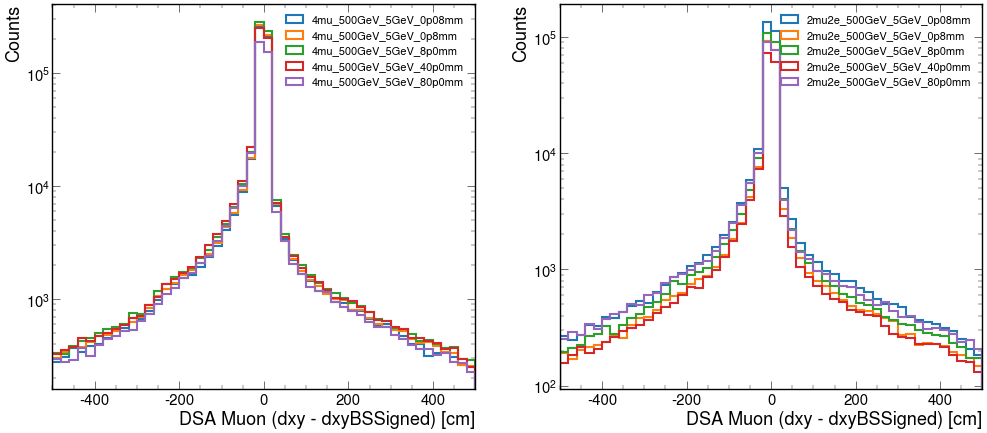

In [50]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyBSSigned", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBSSigned), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBSSigned), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-500,500)
ax[1].set_xlim(-500,500)
ax[0].set_xlabel('DSA Muon (dxy - dxyBSSigned) [cm]')
ax[1].set_xlabel('DSA Muon (dxy - dxyBSSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxy-dxyBSSigned.png", bbox_inches="tight")

4mu dxy - dxyBSSigned structure: [[-2.31, 1.22, -31.8], [-0.0336, 0.00507, ... -691], [-93.5, 0.0311, -39.6, -95]]
2mu2e dxy - dxyBSSigned structure: [[-5.35, -15, 213, -85.6, -7.37], [-0.791, ... [-0.00744, 15.3], [1.1, 0.013, 40.7]]
4mu dxy - dxyBSSigned structure: [[0.0277, -12.6, -0.0325, 0.0321, -5.22], ... -56.5, 74.5], [0.0411, -445, -11.8]]
2mu2e dxy - dxyBSSigned structure: [[4.79], [-42, 0.00526, -52.2, 9.63], ... 0.0116, -169, 4.21, -315], [-0.0398, 2.07]]
4mu dxy - dxyBSSigned structure: [[-0.503, -0.67, 0.0372, 657, -23.4, 0.0374, ... -1.68, -0.0432, 0.879, 0.03, -1.92]]
2mu2e dxy - dxyBSSigned structure: [[33.8, 3.57], [0.00568, -0.0115], ... [-0.0388, 17.2, 1.83, -0.0577, 366]]
4mu dxy - dxyBSSigned structure: [[-0.037, 0.0417, -3.42, -504], [34.1, ... 0.0196, -10.2], [-3.18, -8.89, -0.0248]]
2mu2e dxy - dxyBSSigned structure: [[-5.66, -3.96, -571, -0.0113, 6.3], ... [-0.0432, 0.415], [-0.0255, -0.0271]]
4mu dxy - dxyBSSigned structure: [[-0.0375, 0.0352, -0.0372], [-11.

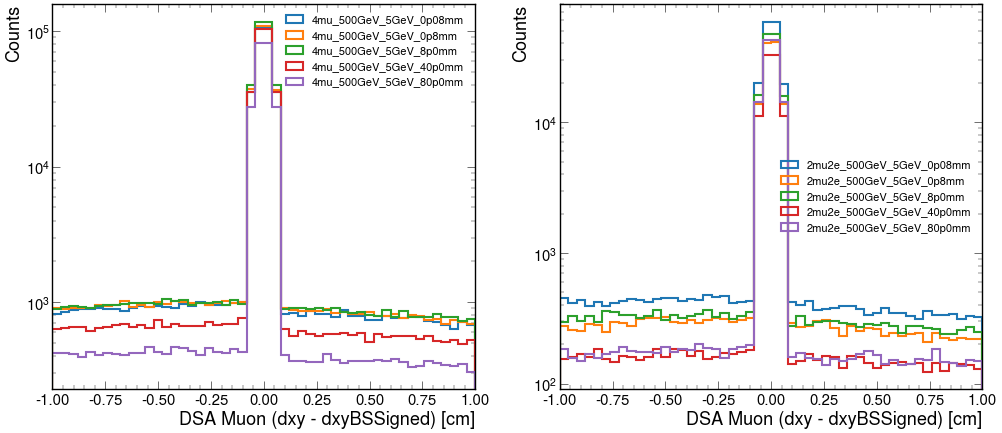

In [20]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyBSSigned", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBSSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBSSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('DSA Muon (dxy - dxyBSSigned) [cm]')
ax[1].set_xlabel('DSA Muon (dxy - dxyBSSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxy-dxyBSSigned_low.png", bbox_inches="tight")

4mu dxy - dxyBSSigned structure: [[-2.31, 1.22, -31.8], [-0.0336, 0.00507, ... -691], [-93.5, 0.0311, -39.6, -95]]
2mu2e dxy - dxyBSSigned structure: [[-5.35, -15, 213, -85.6, -7.37], [-0.791, ... [-0.00744, 15.3], [1.1, 0.013, 40.7]]
4mu dxy - dxyBSSigned structure: [[0.0277, -12.6, -0.0325, 0.0321, -5.22], ... -56.5, 74.5], [0.0411, -445, -11.8]]
2mu2e dxy - dxyBSSigned structure: [[4.79], [-42, 0.00526, -52.2, 9.63], ... 0.0116, -169, 4.21, -315], [-0.0398, 2.07]]
4mu dxy - dxyBSSigned structure: [[-0.503, -0.67, 0.0372, 657, -23.4, 0.0374, ... -1.68, -0.0432, 0.879, 0.03, -1.92]]
2mu2e dxy - dxyBSSigned structure: [[33.8, 3.57], [0.00568, -0.0115], ... [-0.0388, 17.2, 1.83, -0.0577, 366]]
4mu dxy - dxyBSSigned structure: [[-0.037, 0.0417, -3.42, -504], [34.1, ... 0.0196, -10.2], [-3.18, -8.89, -0.0248]]
2mu2e dxy - dxyBSSigned structure: [[-5.66, -3.96, -571, -0.0113, 6.3], ... [-0.0432, 0.415], [-0.0255, -0.0271]]
4mu dxy - dxyBSSigned structure: [[-0.0375, 0.0352, -0.0372], [-11.

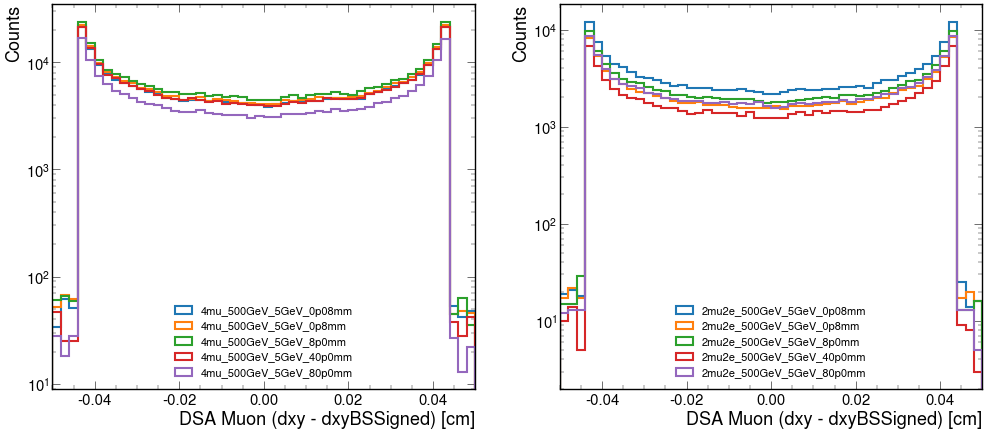

In [22]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyBSSigned", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBSSigned), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBSSigned), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.05,0.05)
ax[1].set_xlim(-0.05,0.05)
ax[0].set_xlabel('DSA Muon (dxy - dxyBSSigned) [cm]')
ax[1].set_xlabel('DSA Muon (dxy - dxyBSSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxy-dxyBSSigned_superlow.png", bbox_inches="tight")

## dxyBS - dxyBSSigned

4mu dxyBS - dxyBSSigned structure: [[-2.35, 1.26, -31.8], [0, 0, -3.05e-05, ... -4.91, -691], [-93.5, 0, -39.6, -94.9]]
2mu2e dxyBS - dxyBSSigned structure: [[-5.32, -15, 213, -85.5, -7.41], [-0.749, 0, ... [0, 15.3], [1.09, 1.49e-08, 40.7]]
4mu dxyBS - dxyBSSigned structure: [[-9.54e-07, -12.6, 0, 0, -5.25], [0, ... -209, -56.5, 74.5], [0, -445, -11.7]]
2mu2e dxyBS - dxyBSSigned structure: [[4.79], [-42, -1.91e-06, -52.2, 9.59], ... 0, -169, 4.16, -315], [0, 2.11]]
4mu dxyBS - dxyBSSigned structure: [[-0.541, -0.708, 0, 657, -23.4, -2.98e-08, ... -1.64, -3.73e-09, 0.922, 0, -1.95]]
2mu2e dxyBS - dxyBSSigned structure: [[33.8, 3.57], [0, 0], [0, 0], ... 0], [-5.14, 0], [0, 17.2, 1.87, -0.0215, 366]]
4mu dxyBS - dxyBSSigned structure: [[0, -2.38e-07, -3.46, -504], [34.1, -317, ... -2.38e-07, -10.2], [-3.2, -8.91, 0]]
2mu2e dxyBS - dxyBSSigned structure: [[-5.69, -3.98, -571, 0, 6.27], [1.19e-07, 0, ... [0, 0.458], [0, -9.54e-07]]
4mu dxyBS - dxyBSSigned structure: [[0, 0, 0], [-11.8, 0,

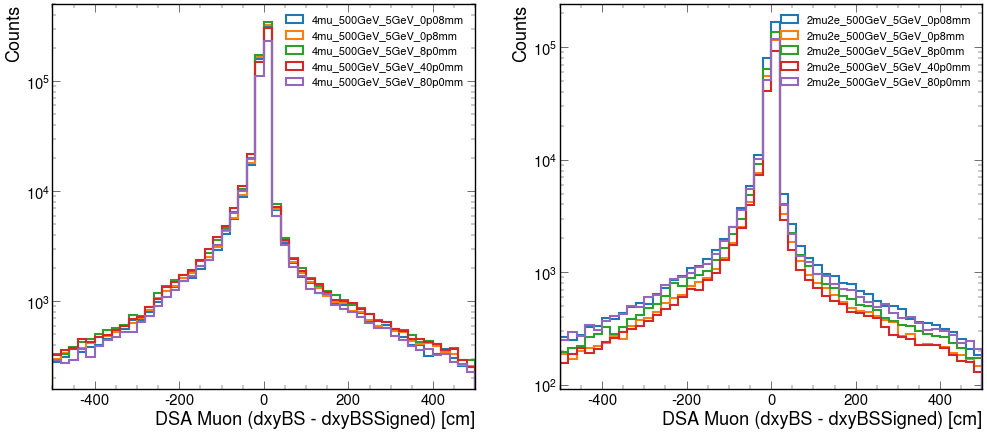

In [22]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBS - dxyBSSigned", events_4mu[i_4mu].dxyBS - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxyBS - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBS - events_4mu[i_4mu].dxyBSSigned), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBS - events_2mu2e[i_2mu].dxyBSSigned), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-500,500)
ax[1].set_xlim(-500,500)
ax[0].set_xlabel('DSA Muon (dxyBS - dxyBSSigned) [cm]')
ax[1].set_xlabel('DSA Muon (dxyBS - dxyBSSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxyBS-dxyBSSigned.png", bbox_inches="tight")

4mu dxyBS - dxyBSSigned structure: [[-2.35, 1.26, -31.8], [0, 0, -3.05e-05, ... -4.91, -691], [-93.5, 0, -39.6, -94.9]]
2mu2e dxyBS - dxyBSSigned structure: [[-5.32, -15, 213, -85.5, -7.41], [-0.749, 0, ... [0, 15.3], [1.09, 1.49e-08, 40.7]]
4mu dxyBS - dxyBSSigned structure: [[-9.54e-07, -12.6, 0, 0, -5.25], [0, ... -209, -56.5, 74.5], [0, -445, -11.7]]
2mu2e dxyBS - dxyBSSigned structure: [[4.79], [-42, -1.91e-06, -52.2, 9.59], ... 0, -169, 4.16, -315], [0, 2.11]]
4mu dxyBS - dxyBSSigned structure: [[-0.541, -0.708, 0, 657, -23.4, -2.98e-08, ... -1.64, -3.73e-09, 0.922, 0, -1.95]]
2mu2e dxyBS - dxyBSSigned structure: [[33.8, 3.57], [0, 0], [0, 0], ... 0], [-5.14, 0], [0, 17.2, 1.87, -0.0215, 366]]
4mu dxyBS - dxyBSSigned structure: [[0, -2.38e-07, -3.46, -504], [34.1, -317, ... -2.38e-07, -10.2], [-3.2, -8.91, 0]]
2mu2e dxyBS - dxyBSSigned structure: [[-5.69, -3.98, -571, 0, 6.27], [1.19e-07, 0, ... [0, 0.458], [0, -9.54e-07]]
4mu dxyBS - dxyBSSigned structure: [[0, 0, 0], [-11.8, 0,

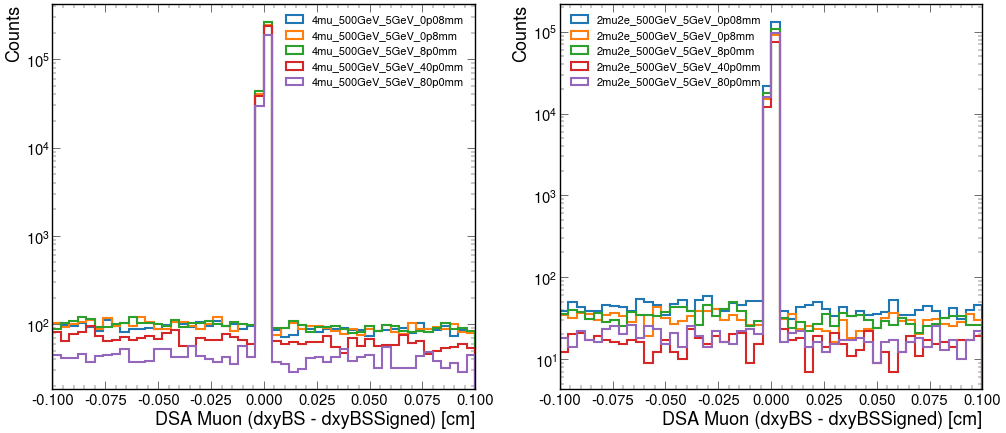

In [24]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBS - dxyBSSigned", events_4mu[i_4mu].dxyBS - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxyBS - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBS - events_4mu[i_4mu].dxyBSSigned), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBS - events_2mu2e[i_2mu].dxyBSSigned), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('DSA Muon (dxyBS - dxyBSSigned) [cm]')
ax[1].set_xlabel('DSA Muon (dxyBS - dxyBSSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dxyBS-dxyBSSigned_low.png", bbox_inches="tight")

## dz

4mu dz structure: [[3.45, 2.42, -2.71], [-60.6, -23.3, -811, ... 4.58, 285], [263, 6.25, 6.89, 6.29]]
2mu2e dz structure: [[2.21, 11.7, 559, 1.96, 9.12], [0.844, -4, ... [4.08, 10.6], [6.84, -9.19, -32.5]]
4mu dz structure: [[-8.2, 3.17, 0.653, 7.35, 1.12], [-192, ... 344, 337, -272], [34.5, -0.465, -8.74]]
2mu2e dz structure: [[-57.7], [49.7, 406, -67.8, 37.4], ... -34.8, -13.5, -1.93, 393], [7.15, 4.22]]
4mu dz structure: [[3.17, 14.9, -14.5, -510, -11, -2.22, -114, ... 7.25, -41.2, 15.7, -3.7, 3.9, 4.46]]
2mu2e dz structure: [[-95.1, 1.16], [6.6, 2.63], [3.87, ... 86.9, 129], [29.6, 72.9, -1.61, -1.49, 477]]
4mu dz structure: [[24.2, -2.96, -41.5, -58.7], [15.8, -106, ... 34.8, 3.17], [19.2, -3.87, 18.8]]
2mu2e dz structure: [[48.2, 1.28, 146, 17.6, -1.68], [0.435, -231, ... -192], [2.26, 1.43], [3.86, 1.18]]
4mu dz structure: [[10.5, -1.53, 3.94], [-80.8, 13.1, 253, ... -4.16, 0.95], [222, 31.8, -84.1, 5.71]]
2mu2e dz structure: [[17.9, 2.58, -4.53, -416, 317], [-359, ... -7.19, 2.

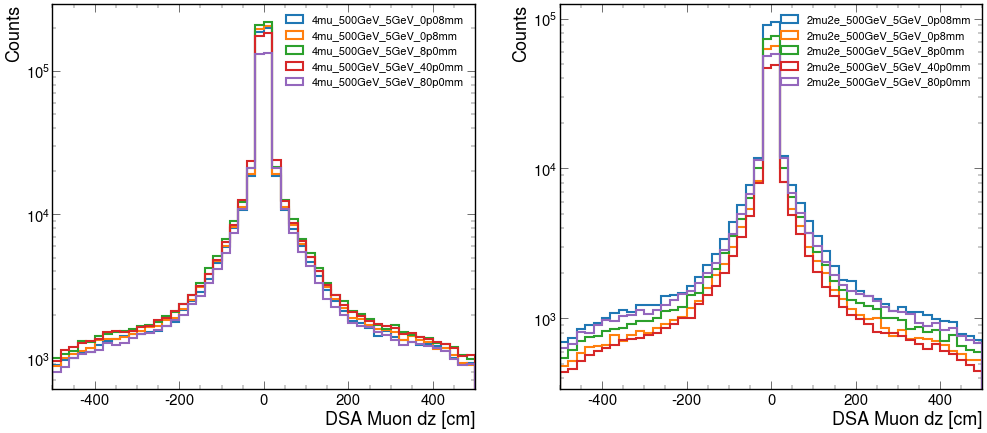

In [26]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz", events_4mu[i_4mu].dz, events_2mu2e[i_2mu].dz)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-500,500)
ax[1].set_xlim(-500,500)
ax[0].set_xlabel('DSA Muon dz [cm]')
ax[1].set_xlabel('DSA Muon dz [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dz.png", bbox_inches="tight")

4mu dz structure: [[3.45, 2.42, -2.71], [-60.6, -23.3, -811, ... 4.58, 285], [263, 6.25, 6.89, 6.29]]
2mu2e dz structure: [[2.21, 11.7, 559, 1.96, 9.12], [0.844, -4, ... [4.08, 10.6], [6.84, -9.19, -32.5]]
4mu dz structure: [[-8.2, 3.17, 0.653, 7.35, 1.12], [-192, ... 344, 337, -272], [34.5, -0.465, -8.74]]
2mu2e dz structure: [[-57.7], [49.7, 406, -67.8, 37.4], ... -34.8, -13.5, -1.93, 393], [7.15, 4.22]]
4mu dz structure: [[3.17, 14.9, -14.5, -510, -11, -2.22, -114, ... 7.25, -41.2, 15.7, -3.7, 3.9, 4.46]]
2mu2e dz structure: [[-95.1, 1.16], [6.6, 2.63], [3.87, ... 86.9, 129], [29.6, 72.9, -1.61, -1.49, 477]]
4mu dz structure: [[24.2, -2.96, -41.5, -58.7], [15.8, -106, ... 34.8, 3.17], [19.2, -3.87, 18.8]]
2mu2e dz structure: [[48.2, 1.28, 146, 17.6, -1.68], [0.435, -231, ... -192], [2.26, 1.43], [3.86, 1.18]]
4mu dz structure: [[10.5, -1.53, 3.94], [-80.8, 13.1, 253, ... -4.16, 0.95], [222, 31.8, -84.1, 5.71]]
2mu2e dz structure: [[17.9, 2.58, -4.53, -416, 317], [-359, ... -7.19, 2.

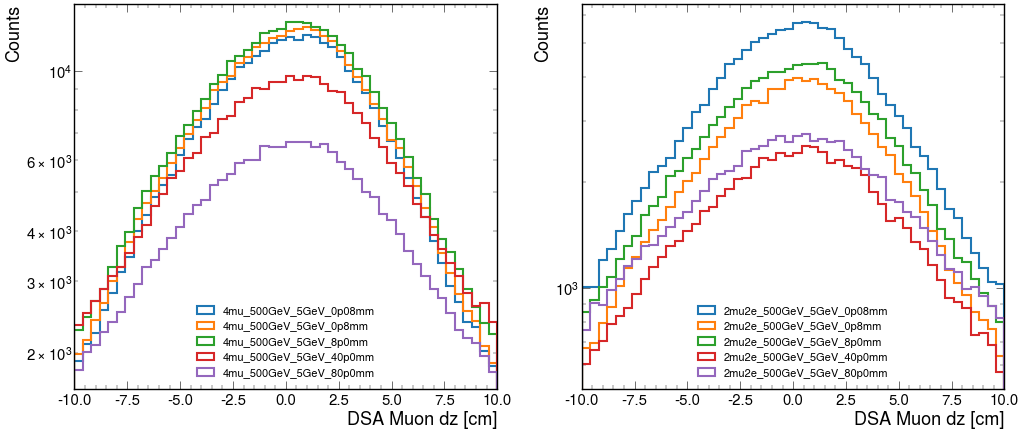

In [27]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz", events_4mu[i_4mu].dz, events_2mu2e[i_2mu].dz)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-10,10)
ax[1].set_xlim(-10,10)
ax[0].set_xlabel('DSA Muon dz [cm]')
ax[1].set_xlabel('DSA Muon dz [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dz_low.png", bbox_inches="tight")

## dzPV

4mu dzPV structure: [[0.817, -0.247, -5.38], [-61.2, -24.1, -812, ... 280], [259, 2.45, 3.1, 2.47]]
2mu2e dzPV structure: [[-0.31, 9.16, 556, -0.679, 6.45], [0.17, ... [2.06, 8.63], [7.54, -8.5, -31.9]]
4mu dzPV structure: [[-11, 0.569, -1.95, 4.7, -1.53], [-192, ... 345, 338, -271], [43, 8.03, -0.258]]
2mu2e dzPV structure: [[-60.4], [49, 405, -68.6, 36.7], ... -34.5, -13.2, -1.57, 394], [0.363, -2.57]]
4mu dzPV structure: [[0.584, 12.3, -17.1, -513, -13.8, -4.8, ... -45.6, 11.3, -8.14, -0.541, 0.0144]]
2mu2e dzPV structure: [[-92.4, 4.05], [5.96, 2], [7.13, ... 79, 121], [31.2, 74.4, -0.0598, 0.0591, 478]]
4mu dzPV structure: [[21.6, -5.62, -44.2, -61.3], [16.5, -105, ... 29.9, -1.81], [14.2, -8.83, 13.4]]
2mu2e dzPV structure: [[45.8, -0.941, 144, 15.4, -3.9], [-0.246, -232, ... [-4.15, -4.99], [3.8, 1.12]]
4mu dzPV structure: [[12.7, 0.647, 6.17], [-82, 11.8, 252, ... -9.9, -4.79], [215, 25.2, -90.7, -0.914]]
2mu2e dzPV structure: [[15, -0.12, -7.24, -419, 314], [-361, ... -10.8, -

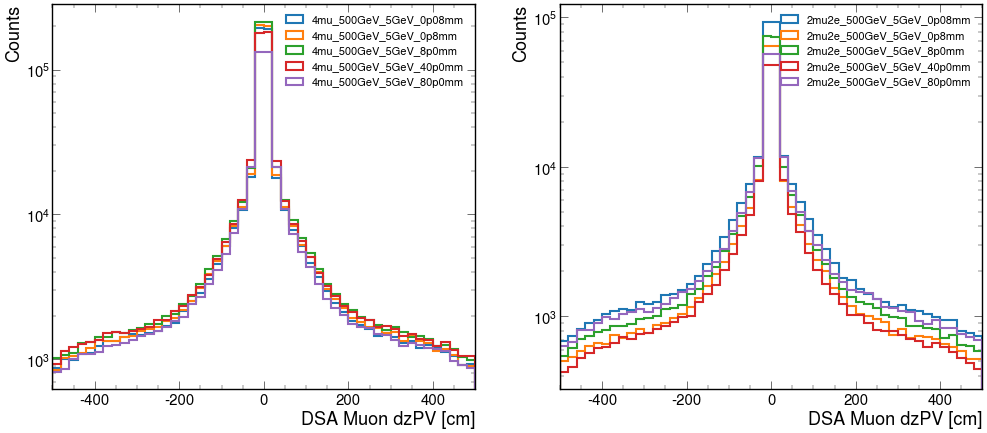

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzPV", events_4mu[i_4mu].dzPV, events_2mu2e[i_2mu].dzPV)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzPV), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzPV), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-500,500)
ax[1].set_xlim(-500,500)
ax[0].set_xlabel('DSA Muon dzPV [cm]')
ax[1].set_xlabel('DSA Muon dzPV [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dzPV.png", bbox_inches="tight")

4mu dzPV structure: [[0.817, -0.247, -5.38], [-61.2, -24.1, -812, ... 280], [259, 2.45, 3.1, 2.47]]
2mu2e dzPV structure: [[-0.31, 9.16, 556, -0.679, 6.45], [0.17, ... [2.06, 8.63], [7.54, -8.5, -31.9]]
4mu dzPV structure: [[-11, 0.569, -1.95, 4.7, -1.53], [-192, ... 345, 338, -271], [43, 8.03, -0.258]]
2mu2e dzPV structure: [[-60.4], [49, 405, -68.6, 36.7], ... -34.5, -13.2, -1.57, 394], [0.363, -2.57]]
4mu dzPV structure: [[0.584, 12.3, -17.1, -513, -13.8, -4.8, ... -45.6, 11.3, -8.14, -0.541, 0.0144]]
2mu2e dzPV structure: [[-92.4, 4.05], [5.96, 2], [7.13, ... 79, 121], [31.2, 74.4, -0.0598, 0.0591, 478]]
4mu dzPV structure: [[21.6, -5.62, -44.2, -61.3], [16.5, -105, ... 29.9, -1.81], [14.2, -8.83, 13.4]]
2mu2e dzPV structure: [[45.8, -0.941, 144, 15.4, -3.9], [-0.246, -232, ... [-4.15, -4.99], [3.8, 1.12]]
4mu dzPV structure: [[12.7, 0.647, 6.17], [-82, 11.8, 252, ... -9.9, -4.79], [215, 25.2, -90.7, -0.914]]
2mu2e dzPV structure: [[15, -0.12, -7.24, -419, 314], [-361, ... -10.8, -

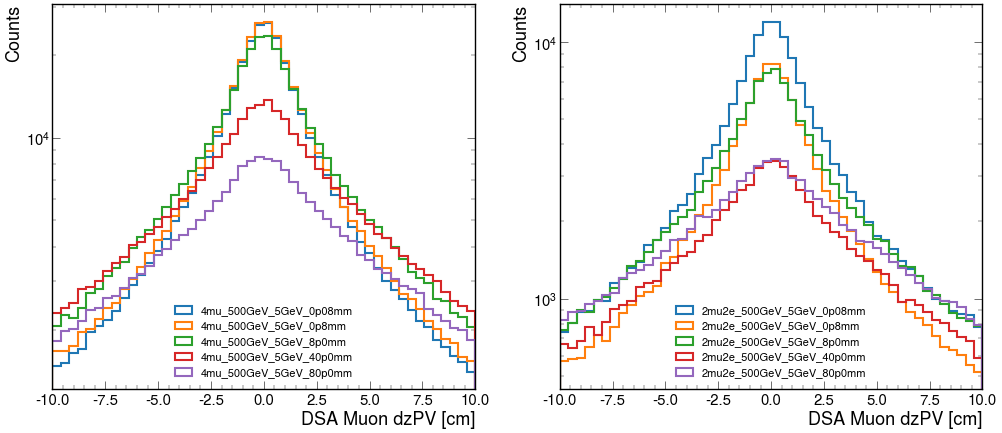

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzPV", events_4mu[i_4mu].dzPV, events_2mu2e[i_2mu].dzPV)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzPV), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzPV), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-10,10)
ax[1].set_xlim(-10,10)
ax[0].set_xlabel('DSA Muon dzPV [cm]')
ax[1].set_xlabel('DSA Muon dzPV [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dzPV_low.png", bbox_inches="tight")

## dz - dzPV

4mu dz - dzPV structure: [[2.64, 2.67, 2.67], [0.585, 0.763, 0.655, ... 4.48, 4.48], [3.84, 3.8, 3.8, 3.82]]
2mu2e dz - dzPV structure: [[2.52, 2.52, 2.56, 2.64, 2.66], [0.674, ... [2.01, 2.01], [-0.697, -0.693, -0.585]]
4mu dz - dzPV structure: [[2.75, 2.6, 2.61, 2.65, 2.65], [0.578, ... -1.02, -1.04], [-8.49, -8.5, -8.49]]
2mu2e dz - dzPV structure: [[2.66], [0.657, 0.808, 0.789, 0.663], ... -0.334, -0.359, -0.376], [6.78, 6.78]]
4mu dz - dzPV structure: [[2.59, 2.58, 2.58, 2.64, 2.8, 2.58, 2.67, ... [4.29, 4.42, 4.43, 4.43, 4.44, 4.45]]
2mu2e dz - dzPV structure: [[-2.67, -2.89], [0.632, 0.638], ... 7.93], [-1.62, -1.46, -1.55, -1.55, -1.55]]
4mu dz - dzPV structure: [[2.59, 2.66, 2.66, 2.67], [-0.723, -0.711, ... 4.99, 4.97], [4.97, 4.96, 5.33]]
2mu2e dz - dzPV structure: [[2.41, 2.22, 2.26, 2.19, 2.22], [0.681, ... [6.41, 6.41], [0.0594, 0.0614]]
4mu dz - dzPV structure: [[-2.22, -2.17, -2.23], [1.21, 1.31, 1.4, ... 5.74, 5.74], [6.82, 6.63, 6.62, 6.63]]
2mu2e dz - dzPV structure:

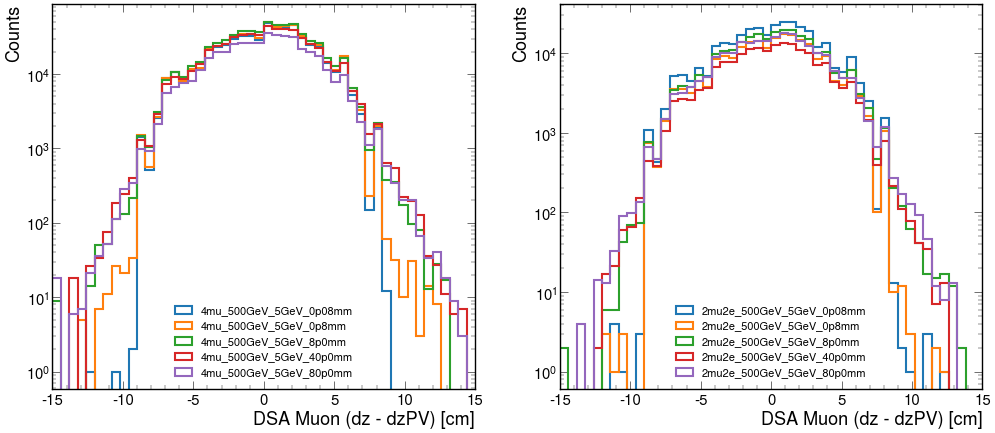

In [25]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz - dzPV", events_4mu[i_4mu].dz - events_4mu[i_4mu].dzPV, events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzPV)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz - events_4mu[i_4mu].dzPV), range=(-15,15), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzPV), range=(-15,15), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-15,15)
ax[1].set_xlim(-15,15)
ax[0].set_xlabel('DSA Muon (dz - dzPV) [cm]')
ax[1].set_xlabel('DSA Muon (dz - dzPV) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dz-dzPV.png", bbox_inches="tight")

4mu dz - dzPV structure: [[2.64, 2.67, 2.67], [0.585, 0.763, 0.655, ... 4.48, 4.48], [3.84, 3.8, 3.8, 3.82]]
2mu2e dz - dzPV structure: [[2.52, 2.52, 2.56, 2.64, 2.66], [0.674, ... [2.01, 2.01], [-0.697, -0.693, -0.585]]
4mu dz - dzPV structure: [[2.75, 2.6, 2.61, 2.65, 2.65], [0.578, ... -1.02, -1.04], [-8.49, -8.5, -8.49]]
2mu2e dz - dzPV structure: [[2.66], [0.657, 0.808, 0.789, 0.663], ... -0.334, -0.359, -0.376], [6.78, 6.78]]
4mu dz - dzPV structure: [[2.59, 2.58, 2.58, 2.64, 2.8, 2.58, 2.67, ... [4.29, 4.42, 4.43, 4.43, 4.44, 4.45]]
2mu2e dz - dzPV structure: [[-2.67, -2.89], [0.632, 0.638], ... 7.93], [-1.62, -1.46, -1.55, -1.55, -1.55]]
4mu dz - dzPV structure: [[2.59, 2.66, 2.66, 2.67], [-0.723, -0.711, ... 4.99, 4.97], [4.97, 4.96, 5.33]]
2mu2e dz - dzPV structure: [[2.41, 2.22, 2.26, 2.19, 2.22], [0.681, ... [6.41, 6.41], [0.0594, 0.0614]]
4mu dz - dzPV structure: [[-2.22, -2.17, -2.23], [1.21, 1.31, 1.4, ... 5.74, 5.74], [6.82, 6.63, 6.62, 6.63]]
2mu2e dz - dzPV structure:

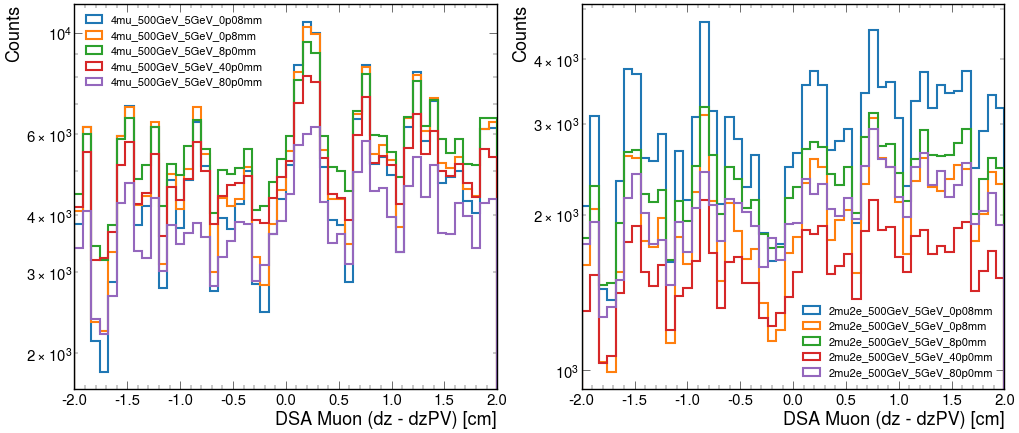

In [26]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz - dzPV", events_4mu[i_4mu].dz - events_4mu[i_4mu].dzPV, events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzPV)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz - events_4mu[i_4mu].dzPV), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzPV), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-2,2)
ax[1].set_xlim(-2,2)
ax[0].set_xlabel('DSA Muon (dz - dzPV) [cm]')
ax[1].set_xlabel('DSA Muon (dz - dzPV) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dz-dzPV_low.png", bbox_inches="tight")

## dzBS

4mu dzBS structure: [[3.45, 2.38, -2.75], [-60.5, -23.4, -811, ... 4.54, 285], [263, 6.22, 6.87, 6.24]]
2mu2e dzBS structure: [[2.32, 11.8, 559, 1.95, 9.09], [0.825, -4.02, ... [4, 10.6], [6.92, -9.12, -32.5]]
4mu dzBS structure: [[-8.32, 3.2, 0.674, 7.33, 1.1], [-191, ... 344, 337, -272], [34.5, -0.488, -8.77]]
2mu2e dzBS structure: [[-57.7], [49.7, 406, -68, 37.4], ... -34.9, -13.5, -1.96, 393], [7.13, 4.2]]
4mu dzBS structure: [[3.21, 15, -14.4, -510, -11.1, -2.17, ... 7.38, -41.2, 15.7, -3.72, 3.88, 4.43]]
2mu2e dzBS structure: [[-95.3, 1.12], [6.62, 2.65], [3.85, ... 87, 129], [29.6, 72.8, -1.63, -1.51, 477]]
4mu dzBS structure: [[24.2, -2.99, -41.5, -58.7], [15.8, -106, ... 34.8, 3.17], [19.3, -3.71, 18.6]]
2mu2e dzBS structure: [[48, 1.28, 146, 17.6, -1.68], [0.411, -231, ... -192], [2.23, 1.39], [3.84, 1.16]]
4mu dzBS structure: [[10.5, -1.57, 3.94], [-80.7, 13.1, 253, ... -4.22, 0.9], [222, 31.9, -84, 5.73]]
2mu2e dzBS structure: [[17.7, 2.51, -4.61, -416, 317], [-359, ... -7.

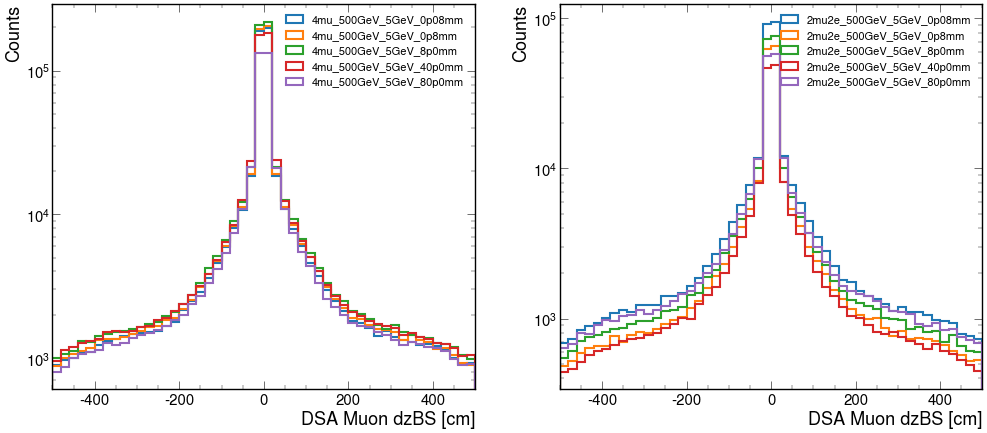

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzBS", events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzBS), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzBS), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-500,500)
ax[1].set_xlim(-500,500)
ax[0].set_xlabel('DSA Muon dzBS [cm]')
ax[1].set_xlabel('DSA Muon dzBS [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dzBS.png", bbox_inches="tight")

4mu dzBS structure: [[3.45, 2.38, -2.75], [-60.5, -23.4, -811, ... 4.54, 285], [263, 6.22, 6.87, 6.24]]
2mu2e dzBS structure: [[2.32, 11.8, 559, 1.95, 9.09], [0.825, -4.02, ... [4, 10.6], [6.92, -9.12, -32.5]]
4mu dzBS structure: [[-8.32, 3.2, 0.674, 7.33, 1.1], [-191, ... 344, 337, -272], [34.5, -0.488, -8.77]]
2mu2e dzBS structure: [[-57.7], [49.7, 406, -68, 37.4], ... -34.9, -13.5, -1.96, 393], [7.13, 4.2]]
4mu dzBS structure: [[3.21, 15, -14.4, -510, -11.1, -2.17, ... 7.38, -41.2, 15.7, -3.72, 3.88, 4.43]]
2mu2e dzBS structure: [[-95.3, 1.12], [6.62, 2.65], [3.85, ... 87, 129], [29.6, 72.8, -1.63, -1.51, 477]]
4mu dzBS structure: [[24.2, -2.99, -41.5, -58.7], [15.8, -106, ... 34.8, 3.17], [19.3, -3.71, 18.6]]
2mu2e dzBS structure: [[48, 1.28, 146, 17.6, -1.68], [0.411, -231, ... -192], [2.23, 1.39], [3.84, 1.16]]
4mu dzBS structure: [[10.5, -1.57, 3.94], [-80.7, 13.1, 253, ... -4.22, 0.9], [222, 31.9, -84, 5.73]]
2mu2e dzBS structure: [[17.7, 2.51, -4.61, -416, 317], [-359, ... -7.

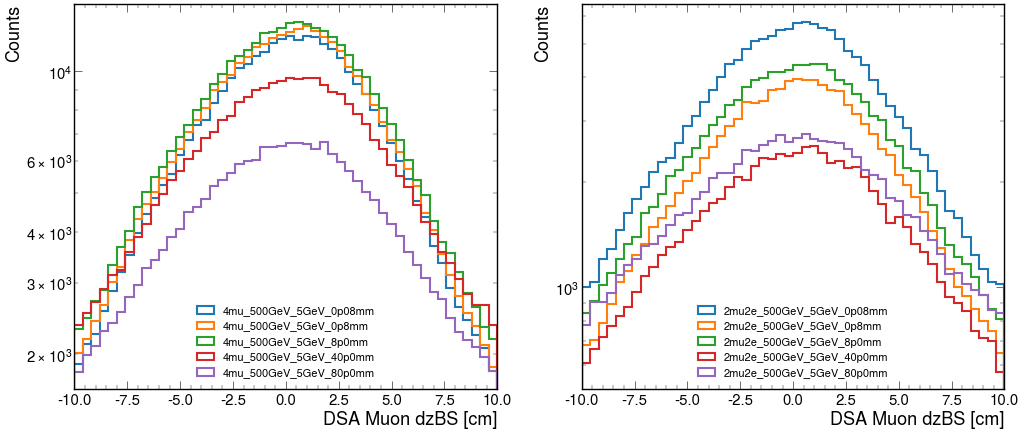

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzBS", events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzBS), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzBS), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-10,10)
ax[1].set_xlim(-10,10)
ax[0].set_xlabel('DSA Muon dzBS [cm]')
ax[1].set_xlabel('DSA Muon dzBS [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dzBS_low.png", bbox_inches="tight")

## dz - dzBS

4mu dz - dzBS structure: [[0.00651, 0.0368, 0.0381], [-0.0777, 0.113, ... [0.0707, 0.0278, 0.0274, 0.0508]]
2mu2e dz - dzBS structure: [[-0.105, -0.104, -0.0704, 0.00797, 0.0311], ... 0.0733], [-0.074, -0.0707, 0.0449]]
4mu dz - dzBS structure: [[0.114, -0.0243, -0.0206, 0.0173, 0.0153], ... 0.0286], [0.0266, 0.0224, 0.0279]]
2mu2e dz - dzBS structure: [[0.0249], [-0.00263, 0.153, 0.137, 0.00306, ... 0.0288, 0.0109], [0.0191, 0.0176]]
4mu dz - dzBS structure: [[-0.0373, -0.0406, -0.044, 0.0127, 0.161, ... 0.0151, 0.0164, 0.0253, 0.0271]]
2mu2e dz - dzBS structure: [[0.255, 0.0356], [-0.0251, -0.0198], ... [-0.0453, 0.109, 0.0226, 0.0226, 0.0239]]
4mu dz - dzBS structure: [[-0.0346, 0.0289, 0.0285, 0.044], [-0.0188, ... -0.00498], [-0.15, -0.159, 0.207]]
2mu2e dz - dzBS structure: [[0.195, 0.00413, 0.0453, -0.0236, 0.00378], ... 0.0319, 0.0371], [0.0162, 0.018]]
4mu dz - dzBS structure: [[-0.00298, 0.0431, -0.00544], [-0.0732, ... [0.155, -0.0234, -0.0303, -0.0142]]
2mu2e dz - dzBS stru

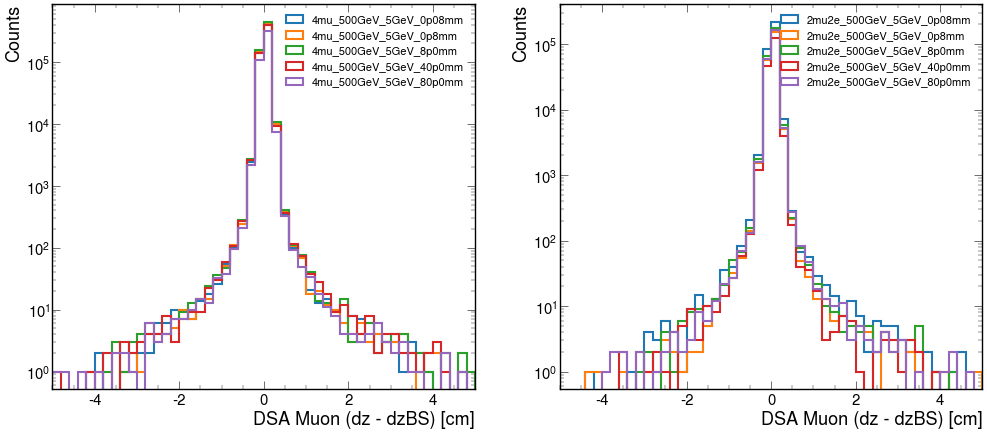

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz - dzBS", events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-5,5)
ax[1].set_xlim(-5,5)
ax[0].set_xlabel('DSA Muon (dz - dzBS) [cm]')
ax[1].set_xlabel('DSA Muon (dz - dzBS) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dz-dzBS.png", bbox_inches="tight")

4mu dz - dzBS structure: [[0.00651, 0.0368, 0.0381], [-0.0777, 0.113, ... [0.0707, 0.0278, 0.0274, 0.0508]]
2mu2e dz - dzBS structure: [[-0.105, -0.104, -0.0704, 0.00797, 0.0311], ... 0.0733], [-0.074, -0.0707, 0.0449]]
4mu dz - dzBS structure: [[0.114, -0.0243, -0.0206, 0.0173, 0.0153], ... 0.0286], [0.0266, 0.0224, 0.0279]]
2mu2e dz - dzBS structure: [[0.0249], [-0.00263, 0.153, 0.137, 0.00306, ... 0.0288, 0.0109], [0.0191, 0.0176]]
4mu dz - dzBS structure: [[-0.0373, -0.0406, -0.044, 0.0127, 0.161, ... 0.0151, 0.0164, 0.0253, 0.0271]]
2mu2e dz - dzBS structure: [[0.255, 0.0356], [-0.0251, -0.0198], ... [-0.0453, 0.109, 0.0226, 0.0226, 0.0239]]
4mu dz - dzBS structure: [[-0.0346, 0.0289, 0.0285, 0.044], [-0.0188, ... -0.00498], [-0.15, -0.159, 0.207]]
2mu2e dz - dzBS structure: [[0.195, 0.00413, 0.0453, -0.0236, 0.00378], ... 0.0319, 0.0371], [0.0162, 0.018]]
4mu dz - dzBS structure: [[-0.00298, 0.0431, -0.00544], [-0.0732, ... [0.155, -0.0234, -0.0303, -0.0142]]
2mu2e dz - dzBS stru

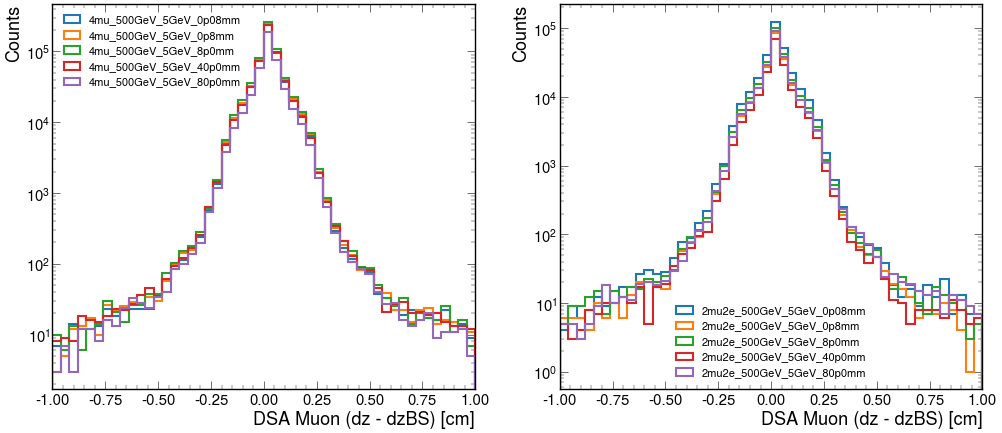

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz - dzBS", events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('DSA Muon (dz - dzBS) [cm]')
ax[1].set_xlabel('DSA Muon (dz - dzBS) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dz-dzBS_low.png", bbox_inches="tight")

4mu dz - dzBS structure: [[0.00651, 0.0368, 0.0381], [-0.0777, 0.113, ... [0.0707, 0.0278, 0.0274, 0.0508]]
2mu2e dz - dzBS structure: [[-0.105, -0.104, -0.0704, 0.00797, 0.0311], ... 0.0733], [-0.074, -0.0707, 0.0449]]
4mu dz - dzBS structure: [[0.114, -0.0243, -0.0206, 0.0173, 0.0153], ... 0.0286], [0.0266, 0.0224, 0.0279]]
2mu2e dz - dzBS structure: [[0.0249], [-0.00263, 0.153, 0.137, 0.00306, ... 0.0288, 0.0109], [0.0191, 0.0176]]
4mu dz - dzBS structure: [[-0.0373, -0.0406, -0.044, 0.0127, 0.161, ... 0.0151, 0.0164, 0.0253, 0.0271]]
2mu2e dz - dzBS structure: [[0.255, 0.0356], [-0.0251, -0.0198], ... [-0.0453, 0.109, 0.0226, 0.0226, 0.0239]]
4mu dz - dzBS structure: [[-0.0346, 0.0289, 0.0285, 0.044], [-0.0188, ... -0.00498], [-0.15, -0.159, 0.207]]
2mu2e dz - dzBS structure: [[0.195, 0.00413, 0.0453, -0.0236, 0.00378], ... 0.0319, 0.0371], [0.0162, 0.018]]
4mu dz - dzBS structure: [[-0.00298, 0.0431, -0.00544], [-0.0732, ... [0.155, -0.0234, -0.0303, -0.0142]]
2mu2e dz - dzBS stru

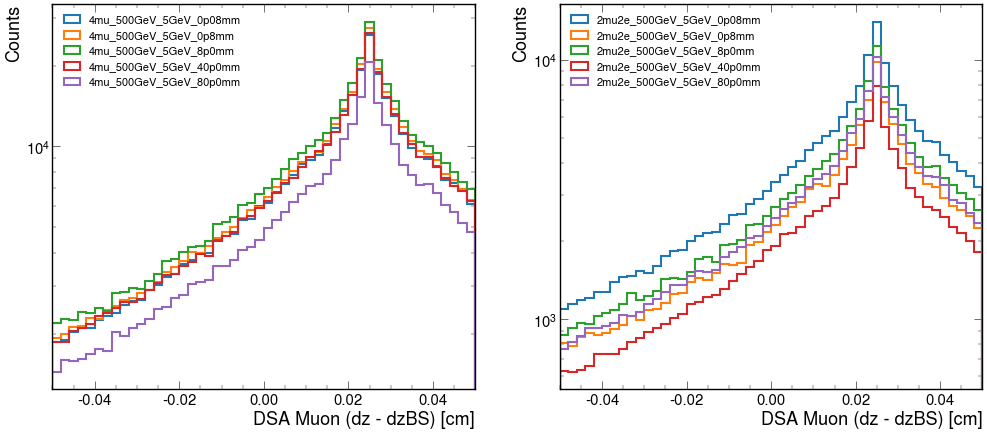

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz - dzBS", events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.05,0.05)
ax[1].set_xlim(-0.05,0.05)
ax[0].set_xlabel('DSA Muon (dz - dzBS) [cm]')
ax[1].set_xlabel('DSA Muon (dz - dzBS) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Displacement/dz-dzBS_superlow.png", bbox_inches="tight")